In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import re
import nltk
from wordcloud import WordCloud
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import time 
import contractions
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.linear_model import LogisticRegression
from textblob import TextBlob
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing  import LabelEncoder


### Importing of Kaggle Repository Twitter Dataset

In this Classification Task, we are trying to train a model to classify our crawled dataset whether the tweets are subjective or objective, positive or negative sentiments

In [2]:
tweets = pd.read_csv("VADER_Labeled_TRAIN.csv")

In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41625 entries, 0 to 41624
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             41625 non-null  int64  
 1   tweet_id               41625 non-null  int64  
 2   ticker_symbol          41625 non-null  object 
 3   writer                 41625 non-null  object 
 4   post_date              41625 non-null  object 
 5   body                   41625 non-null  object 
 6   comment_num            41625 non-null  int64  
 7   retweet_num            41625 non-null  int64  
 8   like_num               41625 non-null  int64  
 9   tweet_activity         41625 non-null  int64  
 10  preprocessed_text      41625 non-null  object 
 11  sentiment              41625 non-null  float64
 12  subjectivity           41625 non-null  float64
 13  sentiment_category     41625 non-null  int64  
 14  subjectivity_category  41625 non-null  int64  
dtypes:

In [4]:
tweets.head()

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,preprocessed_text,sentiment,subjectivity,sentiment_category,subjectivity_category
0,40,550781053137616896,AAPL,CNBC,2015-01-01,This is Wall Street's top pick in 2015. Hint: ...,5,37,22,64,This is Wall Street's top pick in 2015. Hint: ...,0.2023,0.5,1,0
1,47,550779709840445441,AAPL,WSJ,2015-01-01,"See how tech companies like Apple, Twitter and...",15,223,109,347,"See how tech companies like Apple, Twitter and...",0.3612,0.9,1,1
2,242,550650451948212224,AAPL,greatspoke,2015-01-01,Top Stock Analyst Releases Report on Top Stock...,0,431,2,433,Top Stock Analyst Releases Report on Top Stock...,0.3818,0.5,1,0
3,243,550650235404701697,AAPL,greatspoke,2015-01-01,Analyst Report on Top Stock Market Options for...,0,430,3,433,Analyst Report on Top Stock Market Options for...,0.2023,0.5,1,0
4,244,550650235404701697,AMZN,greatspoke,2015-01-01,Analyst Report on Top Stock Market Options for...,0,430,3,433,Analyst Report on Top Stock Market Options for...,0.2023,0.5,1,0


In [5]:
tweets.head()

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,preprocessed_text,sentiment,subjectivity,sentiment_category,subjectivity_category
0,40,550781053137616896,AAPL,CNBC,2015-01-01,This is Wall Street's top pick in 2015. Hint: ...,5,37,22,64,This is Wall Street's top pick in 2015. Hint: ...,0.2023,0.5,1,0
1,47,550779709840445441,AAPL,WSJ,2015-01-01,"See how tech companies like Apple, Twitter and...",15,223,109,347,"See how tech companies like Apple, Twitter and...",0.3612,0.9,1,1
2,242,550650451948212224,AAPL,greatspoke,2015-01-01,Top Stock Analyst Releases Report on Top Stock...,0,431,2,433,Top Stock Analyst Releases Report on Top Stock...,0.3818,0.5,1,0
3,243,550650235404701697,AAPL,greatspoke,2015-01-01,Analyst Report on Top Stock Market Options for...,0,430,3,433,Analyst Report on Top Stock Market Options for...,0.2023,0.5,1,0
4,244,550650235404701697,AMZN,greatspoke,2015-01-01,Analyst Report on Top Stock Market Options for...,0,430,3,433,Analyst Report on Top Stock Market Options for...,0.2023,0.5,1,0


### Importing of Crawled Twitter Dataset

This is the crawled dataset from twitter with regards to stocks such as AAPL, AMZN, MSFT, TSLA, GOOGL

In [6]:
crawled_tweets = pd.read_csv('VADER_labeled_TEST.csv')

In [7]:
crawled_tweets.tail()

,Unnamed: 0,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,tweet_activity,url_cnt,...,subjectivity,sentiment,moderator,clean_text_no_stem_user,moderated_sent,preprocessed_text,vader_sentiment,textblob_subjectivity,sentiment_category,subjectivity_category
4293,4293,TSLA,2023-02-28 23:25:43+00:00,1.630711e+18,BestTrader01,"$TSLA #TSLA Options Interest! $800sssss, 600ss...",59,7,71,1,...,1,0.0,NaN,TSLA TSLA Options Interest 800sssss 600sss 300...,0,"$TSLA Options Interest! $800sssss, 600sss $30...",0.5550,0.00000,1,0
4294,4294,TSLA,2023-02-28 23:23:40+00:00,1.630710e+18,MatchasmMatt,$RIVN down nearly 10% after earnings. These co...,84,10,96,0,...,1,0.5,1.0,RIVN nearly 10 earnings These companies making...,1,$RIVN down nearly 10% after earnings. These co...,0.4404,0.42963,1,0
4295,4295,TSLA,2023-02-28 23:20:10+00:00,1.630709e+18,susanblas,No surprise here. $TSLA does not give a flying...,39,0,50,0,...,1,-1.0,NaN,No surprise TSLA give flying fuck customers th...,-1,No surprise here. $TSLA does not give a flying...,-0.6501,0.60000,-1,1
4296,4296,TSLA,2023-02-28 23:12:27+00:00,1.630708e+18,stevenmarkryan,Is it just me or is it CREEPY AF that I get no...,267,37,311,0,...,1,-1.0,NaN,Is CREEPY AF I get notifications someone adds ...,-1,Is it just me or is it CREEPY AF that I get no...,-0.6166,1.00000,-1,1
4297,4297,TSLA,2023-02-28 23:06:48+00:00,1.630706e+18,stevenmarkryan,Can't wait to see how pissed the cry babies wh...,289,16,320,0,...,1,-1.0,NaN,Cant wait see pissed cry babies also TSLA elon...,-1,Can't wait to see how pissed the cry babies wh...,-0.3952,0.84000,-1,1


In [8]:
remaining_data = pd.read_csv('remaining_data.csv')

In [9]:
remaining_data.head()

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,emoticons,emojis,emo_cnt,word_count,clean_text
0,APPL,2023-01-01 21:51:38+00:00,1609668699513839616,BalarezoCapital,$AAPL \n\nAAPL is in a DOWNTREND below all KMA...,9,0,3,12,1,[],{},0,16,aapl aapl downtrend kma high probabl continu l...
1,APPL,2023-01-01 21:31:03+00:00,1609663518265192448,DZierler,@Johnbenny101 I believe winning #VR #MixedReal...,6,1,3,10,0,[],{'✅': 5},5,41,johnbenny101 believ win vr mixedr ar display a...
2,APPL,2023-01-01 21:30:09+00:00,1609663291793747969,SPXTrades,Everyone is looking for $AAPL to fall into 95-...,20,2,1,23,1,[],{},0,33,everyon look aapl fall 95100 zone last bulwark...
3,APPL,2023-01-01 21:00:03+00:00,1609655716767318021,bullsonwallst,Current Berkshire Hathaway portfolio📊\n\nToo m...,11,1,3,15,1,[],{'📊': 1},1,7,current berkshir hathaway portfolioemojiplaceh...
4,APPL,2023-01-01 20:15:42+00:00,1609644555598438400,ThePupOfWallSt,#AAPL $AAPL Weekly Chart⁠\n⁠\nNotes on the cha...,14,1,5,20,1,[],{},0,9,aapl aapl weekli chart note chart courtesi tre...


In [10]:
def datasetInfo(dataset):
    print(f" Dataset Information and type \n {dataset.info()}")
    print("--------------------------------------------------------\n\n Data Types: ")
    print(dataset.dtypes)
    print("--------------------------------------------------------\n\n Rows and Columns: ")
    print(dataset.shape)
    print("--------------------------------------------------------\n\n Column Names: ")
    print(dataset.columns)
    print("--------------------------------------------------------\n\n Null Values: ")
    print(dataset.apply(lambda x: sum(x.isnull()) / len(dataset)))
    print("--------------------------------------------------------\n\n Unique Values: ")
    print(dataset.nunique())
    print("--------------------------------------------------------\n\n Describe: ")
    print(dataset.describe())

In [11]:
datasetInfo(tweets)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41625 entries, 0 to 41624
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             41625 non-null  int64  
 1   tweet_id               41625 non-null  int64  
 2   ticker_symbol          41625 non-null  object 
 3   writer                 41625 non-null  object 
 4   post_date              41625 non-null  object 
 5   body                   41625 non-null  object 
 6   comment_num            41625 non-null  int64  
 7   retweet_num            41625 non-null  int64  
 8   like_num               41625 non-null  int64  
 9   tweet_activity         41625 non-null  int64  
 10  preprocessed_text      41625 non-null  object 
 11  sentiment              41625 non-null  float64
 12  subjectivity           41625 non-null  float64
 13  sentiment_category     41625 non-null  int64  
 14  subjectivity_category  41625 non-null  int64  
dtypes:

In [12]:
datasetInfo(remaining_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ticker_symbol   3080 non-null   object
 1   post_date       3080 non-null   object
 2   tweet_id        3080 non-null   int64 
 3   writer          3080 non-null   object
 4   body            3080 non-null   object
 5   like_num        3080 non-null   int64 
 6   comment_num     3080 non-null   int64 
 7   retweet_num     3080 non-null   int64 
 8   tweet_activity  3080 non-null   int64 
 9   url_cnt         3080 non-null   int64 
 10  emoticons       3080 non-null   object
 11  emojis          3080 non-null   object
 12  emo_cnt         3080 non-null   int64 
 13  word_count      3080 non-null   int64 
 14  clean_text      3080 non-null   object
dtypes: int64(8), object(7)
memory usage: 361.1+ KB
 Dataset Information and type 
 None
--------------------------------------------------------

In [13]:
datasetInfo(crawled_tweets)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4298 entries, 0 to 4297
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               4298 non-null   int64  
 1   ticker_symbol            4298 non-null   object 
 2   post_date                4298 non-null   object 
 3   tweet_id                 4298 non-null   float64
 4   writer                   4298 non-null   object 
 5   body                     4298 non-null   object 
 6   like_num                 4298 non-null   int64  
 7   comment_num              4298 non-null   int64  
 8   tweet_activity           4298 non-null   int64  
 9   url_cnt                  4298 non-null   int64  
 10  emoticons                4298 non-null   object 
 11  emojis                   4298 non-null   object 
 12  emo_cnt                  4298 non-null   int64  
 13  word_count               4298 non-null   int64  
 14  clean_text              

In [14]:
crawled_tweets.head()

,Unnamed: 0,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,tweet_activity,url_cnt,...,subjectivity,sentiment,moderator,clean_text_no_stem_user,moderated_sent,preprocessed_text,vader_sentiment,textblob_subjectivity,sentiment_category,subjectivity_category
0,0,AAPL,2023-01-01 22:23:31+00:00,1.609677e+18,David_Tracey,Things are going to get very interesting but w...,27,1,30,2,...,0,0.0,NaN,Things going get interesting My Q1 forecast So...,0,Things are going to get very interesting but w...,0.2492,0.650000,1,1
1,1,AAPL,2023-01-01 21:04:45+00:00,1.609657e+18,ASTS_Investors,Happy New Year SpaceMob! \n\nLet's hope 2023 w...,64,0,67,1,...,1,1.0,NaN,Happy New Year SpaceMob Lets hope 2023 year Bl...,1,Happy New Year SpaceMob! \n\nLet's hope 2023 w...,0.7840,0.727273,1,1
2,2,AAPL,2023-01-01 20:44:51+00:00,1.609652e+18,BigCheds,$AAPL Apple weekly chart - hammer candle with ...,104,9,118,1,...,0,0.0,NaN,AAPL Apple weekly chart hammer candle spring J...,0,$AAPL Apple weekly chart - hammer candle with ...,-0.2023,0.000000,-1,0
3,3,AAPL,2023-01-01 19:45:30+00:00,1.609637e+18,ThetaWarrior,$AAPL Yearly -26.8% https://t.co/SewErQmOPE,80,10,100,1,...,0,0.0,NaN,AAPL Yearly 268,0,$AAPL Yearly -26.8%,0.0000,0.000000,0,0
4,4,AAPL,2023-01-01 19:00:00+00:00,1.609626e+18,TrendSpider,Looking for shorts into the new year? ð\n\n...,28,4,36,1,...,1,1.0,NaN,Looking shorts new year This weekly triangle b...,1,Looking for shorts into the new year? ð\n\n...,0.6588,0.734848,1,1


After Merging Remove the dataframes that columns are empty

In [15]:
tweets.dropna(inplace = True)

Refactoring the Polarity Values of testing crawled_tweets

Convert our tweet date_time into just date

In [16]:
tweets['post_date'] = pd.to_datetime(tweets["post_date"],utc = False , unit = 's',).dt.normalize()
tweets['post_date'] = tweets["post_date"].dt.date
tweets.head()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "pandas\_libs\tslib.pyx", line 315, in pandas._libs.tslib.array_with_unit_to_datetime
ValueError: could not convert string to float: '2015-01-01'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\eric2\AppData\Local\Temp\ipykernel_55808\193415904.py", line 1, in <module>
    tweets['post_date'] = pd.to_datetime(tweets["post_date"],utc = False , unit = 's',).dt.normalize()
  File "C:\Users\eric2\AppData\Roaming\Python\Python310\site-packages\pandas\core\tools\datetimes.py", line 1047, in to_datetime
    cache_array = _maybe_cache(arg, format, cache, convert_listlike)
  File "C:\Users\eric2\AppData\Roaming\Python\Python310\site-packages\pandas\core\tools\datetimes.py", line 197, in _may

In [17]:
crawled_tweets['post_date'] = pd.to_datetime(crawled_tweets['post_date'])
crawled_tweets['post_date'] = crawled_tweets['post_date'].dt.date

We need to differentiate active tweets which are more "Reputable" compared to botting tweets or spams. <br>
Activities can be defined as comments/replies, retweets, and likes.

In [18]:
tweets.sort_values(by = "comment_num" , ascending  = False, inplace = True)
tweets


,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,preprocessed_text,sentiment,subjectivity,sentiment_category,subjectivity_category
16050,3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,"I’d just like to point out that right now, rig...",0.7783,0.457143,1,0
29670,4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,"If a Tesla saves you $200 a month on gas, you ...",0.0000,0.400000,0,0
39968,4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,~Tesla feature request thread~Feel free to rep...,0.5106,0.900000,1,1
10501,2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,"""I sell books."" versus ""I sell whatever the fu...",-0.4939,0.600000,-1,1
33022,4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,“I think it's basically financially insane to ...,0.2350,0.383333,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12929,3347805,1113794842461724672,MSFT,StockRockNRoll,2019-04-04,Add $SNWV | #SANUWAVEHealth to the top of your...,0,82,97,179,Add $SNWV | to the top of your watchlist. Tra...,0.5707,0.500000,1,0
18187,3856253,1031725885106343936,TSLA,TESLAcharts,2018-08-21,A FingerChart dedicated to my favorite follow ...,0,3,55,58,A FingerChart dedicated to my favorite follow ...,0.7184,1.000000,1,1
1820,873615,795832008656252928,AAPL,Sandro_power,2016-11-08,$AAPL in my Video https://youtu.be/9ZNFi0B4CsQ...,0,31,36,67,$AAPL in my Video I talk about the special $...,0.4019,0.571429,1,1
1818,872187,795454505357889537,AAPL,ppprophet,2016-11-07,$SPX UPTREND LINE BREAKDOWN #stocks #STOCKMAR...,0,41,52,93,$SPX UPTREND LINE BREAKDOWN $VIX $TVIX $UVX...,0.0000,0.000000,0,0


The tweet activities will be defined by the summation of all comments/replies, likes and retweets to differentiate from bots or spams, where tweets are more "usable" for sentimental analysis

In [19]:
tweets["tweet_activity"] = tweets["comment_num"] + tweets["like_num"] + tweets["retweet_num"]
tweets

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,preprocessed_text,sentiment,subjectivity,sentiment_category,subjectivity_category
16050,3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,"I’d just like to point out that right now, rig...",0.7783,0.457143,1,0
29670,4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,"If a Tesla saves you $200 a month on gas, you ...",0.0000,0.400000,0,0
39968,4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,~Tesla feature request thread~Feel free to rep...,0.5106,0.900000,1,1
10501,2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,"""I sell books."" versus ""I sell whatever the fu...",-0.4939,0.600000,-1,1
33022,4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,“I think it's basically financially insane to ...,0.2350,0.383333,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12929,3347805,1113794842461724672,MSFT,StockRockNRoll,2019-04-04,Add $SNWV | #SANUWAVEHealth to the top of your...,0,82,97,179,Add $SNWV | to the top of your watchlist. Tra...,0.5707,0.500000,1,0
18187,3856253,1031725885106343936,TSLA,TESLAcharts,2018-08-21,A FingerChart dedicated to my favorite follow ...,0,3,55,58,A FingerChart dedicated to my favorite follow ...,0.7184,1.000000,1,1
1820,873615,795832008656252928,AAPL,Sandro_power,2016-11-08,$AAPL in my Video https://youtu.be/9ZNFi0B4CsQ...,0,31,36,67,$AAPL in my Video I talk about the special $...,0.4019,0.571429,1,1
1818,872187,795454505357889537,AAPL,ppprophet,2016-11-07,$SPX UPTREND LINE BREAKDOWN #stocks #STOCKMAR...,0,41,52,93,$SPX UPTREND LINE BREAKDOWN $VIX $TVIX $UVX...,0.0000,0.000000,0,0


### Filter Tweets that are >= 10 activities

In [20]:
filterTweets = tweets.loc[tweets["tweet_activity"] > 25]

In [21]:
filterTweets.head()

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,preprocessed_text,sentiment,subjectivity,sentiment_category,subjectivity_category
16050,3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,"I’d just like to point out that right now, rig...",0.7783,0.457143,1,0
29670,4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,"If a Tesla saves you $200 a month on gas, you ...",0.0000,0.400000,0,0
39968,4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,~Tesla feature request thread~Feel free to rep...,0.5106,0.900000,1,1
10501,2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,"""I sell books."" versus ""I sell whatever the fu...",-0.4939,0.600000,-1,1
33022,4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,“I think it's basically financially insane to ...,0.2350,0.383333,1,0


In [22]:
filterTweets.describe()

,Unnamed: 0,tweet_id,comment_num,retweet_num,like_num,tweet_activity,sentiment,subjectivity,sentiment_category,subjectivity_category
count,4.162500e+04,4.162500e+04,41625.000000,41625.000000,41625.000000,41625.000000,41625.000000,41625.000000,41625.000000,41625.000000
mean,3.352326e+06,1.049881e+18,9.375808,29.118775,94.410907,132.905489,0.101260,0.379724,0.179027,0.323267
std,1.146236e+06,1.361704e+17,15.281991,63.833735,98.093655,134.698745,0.448945,0.286233,0.823740,0.467729
min,4.000000e+01,5.504536e+17,0.000000,0.000000,0.000000,51.000000,-0.997800,0.000000,-1.000000,0.000000
25%,2.809090e+06,1.016411e+18,3.000000,7.000000,46.000000,64.000000,-0.102700,0.083333,-1.000000,0.000000
50%,3.925837e+06,1.081987e+18,6.000000,14.000000,64.000000,88.000000,0.000000,0.400000,0.000000,0.000000
75%,4.144986e+06,1.138579e+18,11.000000,29.000000,102.000000,142.000000,0.446600,0.566667,1.000000,1.000000
max,4.336399e+06,1.212129e+18,631.000000,999.000000,999.000000,1703.000000,0.993400,1.000000,1.000000,1.000000


### Data Cleaning and Tokenization of text body

In [23]:
# Function to remove stopwords (common english stopwords from nltk)
def removeStopWords(df):
    finalList = []
    stop_words = set(stopwords.words('english'))
    for word in df:
        if word not in stop_words:
            finalList.append(word)
    df = finalList
    return df

In [24]:
# Function to stem tweets 
def stem_text(text):
    
    stemmer = PorterStemmer()
   
    return [stemmer.stem(word) for word in text]

In [25]:
# Function to lemmatise tweets
def lemmatised_text(text):
    lemmatiser = nltk.stem.WordNetLemmatizer()
    return [lemmatiser.lemmatize(word) for word in text]

In [26]:
def replace_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

In [27]:
def remove_username(text):
    return re.sub(r'@\w+', '', text)

In [28]:
def remove_hashtag(text):
    return re.sub(r'#\w+', '', text)

In [29]:
def clean_dataframe_text(df, column,lemma):
    
    # Define regex pattern to match URLs
    url_pattern = r"https?://\S+"
    # Remove URLs from text column
    df[column] = df[column].str.replace(url_pattern, "", regex=True)
    # Remove username from text column
    df[column] = df[column].apply(lambda x: remove_username(x))
     # Remove hashtag from text column
    df[column] = df[column].apply(lambda x: remove_hashtag(x))
    #df[column] = df[column].apply(lambda x: replace_contractions(x))
    df[column] = df[column].apply(lambda x: re.sub(r"(\w+)'d", lambda m: 'would' if m.group(1) in ['he', 'she', 'it', 'that'] else 'had', x))
    # Replace 's with 'is' or 'has'
    df[column] = df[column].apply(lambda x: re.sub(r"(\w+)'s", lambda m: 'is' if m.group(1) in ['he', 'she', 'it'] else 'has', x))
    # Remove any non-alphanumeric characters and replace them with spaces
    df[column] = df[column].apply(lambda x: re.sub(r'[^\w\s]', '', x))
    # Replace any consecutive whitespace characters with a single space
    df[column] = df[column].apply(lambda x: re.sub(r'\s+', ' ', x))
    # Remove not word characters
    df[column] = df[column].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
    # Remove digits 
    df[column] = df[column].apply(lambda x: re.sub(r'\d+', '', x))
    # Convert the string in lower
    df[column] = df[column].str.lower()
    # Tokenised the words
    df[column]  = df[column].apply(lambda x : nltk.word_tokenize(x))
    # Remove stopwords from the NLTK stopword list
    # df[column] = df[column].apply(lambda x : removeStopWords(x))
    if lemma:
    # lemmatised the text
        df[column] = df[column].apply(lambda x : lemmatised_text(x))
    else:
    # Stemmed the text
        df[column] = df[column].apply(lambda x : stem_text(x))
    #concatenate the tokenised list into string
    df[column] = df[column].apply(lambda x: ' '.join(x))
    return df

In [30]:
filterTweetsNo = filterTweets.copy()
crawledTweetsNo = crawled_tweets.copy()

In [31]:
# Tweets that are cleaned and lemmatised
filterTweetsLemma = filterTweets.copy()
filterTweetsLemma = clean_dataframe_text(filterTweetsLemma,"preprocessed_text",True)
filterTweetsLemma.head()

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,preprocessed_text,sentiment,subjectivity,sentiment_category,subjectivity_category
16050,3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...,0.7783,0.457143,1,0
29670,4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on gas you own it ...,0.0000,0.400000,0,0
39968,4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla feature request threadfeel free to reply...,0.5106,0.900000,1,1
10501,2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versus i sell whatever the fuck i ...,-0.4939,0.600000,-1,1
33022,4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,i think is basically financially insane to buy...,0.2350,0.383333,1,0


In [32]:
# Tweets that are cleaned and stemmed

filterTweets = clean_dataframe_text(filterTweets,"preprocessed_text",False)
filterTweets.head()

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,preprocessed_text,sentiment,subjectivity,sentiment_category,subjectivity_category
16050,3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...,0.7783,0.457143,1,0
29670,4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on ga you own it f...,0.0000,0.400000,0,0
39968,4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...,0.5106,0.900000,1,1
10501,2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...,-0.4939,0.600000,-1,1
33022,4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,i think is basic financi insan to buy anyth ex...,0.2350,0.383333,1,0


In [33]:
# crawled_tweets = crawled_tweets[2146:2548]

In [34]:
crawled_tweets_lemma = crawled_tweets.copy()
crawled_tweets_lemma = clean_dataframe_text(crawled_tweets_lemma,"preprocessed_text",True)

In [35]:

crawled_tweets = clean_dataframe_text(crawled_tweets,"preprocessed_text",False)

In [36]:
filterTweets

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,preprocessed_text,sentiment,subjectivity,sentiment_category,subjectivity_category
16050,3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...,0.7783,0.457143,1,0
29670,4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on ga you own it f...,0.0000,0.400000,0,0
39968,4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...,0.5106,0.900000,1,1
10501,2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...,-0.4939,0.600000,-1,1
33022,4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,i think is basic financi insan to buy anyth ex...,0.2350,0.383333,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12929,3347805,1113794842461724672,MSFT,StockRockNRoll,2019-04-04,Add $SNWV | #SANUWAVEHealth to the top of your...,0,82,97,179,add snwv to the top of your watchlist trade at...,0.5707,0.500000,1,0
18187,3856253,1031725885106343936,TSLA,TESLAcharts,2018-08-21,A FingerChart dedicated to my favorite follow ...,0,3,55,58,a fingerchart dedic to my favorit follow on tw...,0.7184,1.000000,1,1
1820,873615,795832008656252928,AAPL,Sandro_power,2016-11-08,$AAPL in my Video https://youtu.be/9ZNFi0B4CsQ...,0,31,36,67,aapl in my video i talk about the special aapl...,0.4019,0.571429,1,1
1818,872187,795454505357889537,AAPL,ppprophet,2016-11-07,$SPX UPTREND LINE BREAKDOWN #stocks #STOCKMAR...,0,41,52,93,spx uptrend line breakdown vix tvix uvxi xiv v...,0.0000,0.000000,0,0


In [37]:
crawled_tweets

,Unnamed: 0,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,tweet_activity,url_cnt,...,subjectivity,sentiment,moderator,clean_text_no_stem_user,moderated_sent,preprocessed_text,vader_sentiment,textblob_subjectivity,sentiment_category,subjectivity_category
0,0,AAPL,2023-01-01,1.609677e+18,David_Tracey,Things are going to get very interesting but w...,27,1,30,2,...,0,0.0,NaN,Things going get interesting My Q1 forecast So...,0,thing are go to get veri interest but when my ...,0.2492,0.650000,1,1
1,1,AAPL,2023-01-01,1.609657e+18,ASTS_Investors,Happy New Year SpaceMob! \n\nLet's hope 2023 w...,64,0,67,1,...,1,1.0,NaN,Happy New Year SpaceMob Lets hope 2023 year Bl...,1,happi new year spacemob ha hope will be the ye...,0.7840,0.727273,1,1
2,2,AAPL,2023-01-01,1.609652e+18,BigCheds,$AAPL Apple weekly chart - hammer candle with ...,104,9,118,1,...,0,0.0,NaN,AAPL Apple weekly chart hammer candle spring J...,0,aapl appl weekli chart hammer candl with sprin...,-0.2023,0.000000,-1,0
3,3,AAPL,2023-01-01,1.609637e+18,ThetaWarrior,$AAPL Yearly -26.8% https://t.co/SewErQmOPE,80,10,100,1,...,0,0.0,NaN,AAPL Yearly 268,0,aapl yearli,0.0000,0.000000,0,0
4,4,AAPL,2023-01-01,1.609626e+18,TrendSpider,Looking for shorts into the new year? ð\n\n...,28,4,36,1,...,1,1.0,NaN,Looking shorts new year This weekly triangle b...,1,look for short into the new year ð thi weekli ...,0.6588,0.734848,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4293,4293,TSLA,2023-02-28,1.630711e+18,BestTrader01,"$TSLA #TSLA Options Interest! $800sssss, 600ss...",59,7,71,1,...,1,0.0,NaN,TSLA TSLA Options Interest 800sssss 600sss 300...,0,tsla option interest sssss sss ss ha go,0.5550,0.000000,1,0
4294,4294,TSLA,2023-02-28,1.630710e+18,MatchasmMatt,$RIVN down nearly 10% after earnings. These co...,84,10,96,0,...,1,0.5,1.0,RIVN nearly 10 earnings These companies making...,1,rivn down nearli after earn these compani are ...,0.4404,0.429630,1,0
4295,4295,TSLA,2023-02-28,1.630709e+18,susanblas,No surprise here. $TSLA does not give a flying...,39,0,50,0,...,1,-1.0,NaN,No surprise TSLA give flying fuck customers th...,-1,no surpris here tsla doe not give a fli fuck a...,-0.6501,0.600000,-1,1
4296,4296,TSLA,2023-02-28,1.630708e+18,stevenmarkryan,Is it just me or is it CREEPY AF that I get no...,267,37,311,0,...,1,-1.0,NaN,Is CREEPY AF I get notifications someone adds ...,-1,is it just me or is it creepi af that i get no...,-0.6166,1.000000,-1,1


### Tweet EDA

In [38]:
filterTweets["writer"].describe()


count           41625
unique           2797
top       TESLAcharts
freq             2212
Name: writer, dtype: object

In [39]:
crawled_tweets["writer"].describe()

count             4298
unique            1253
top       StockMKTNewz
freq               146
Name: writer, dtype: object

### Writer Data Exploration

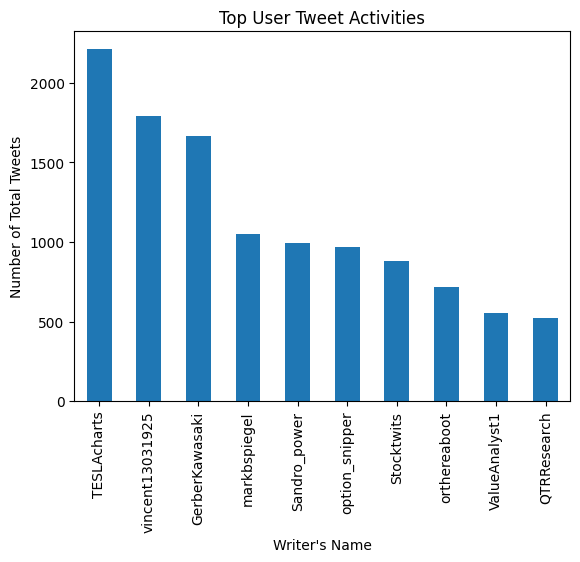

In [40]:

counts = filterTweets["writer"].value_counts(ascending= False)
countsFilter = counts[:10]
countsFilter.plot(kind="bar")

plt.title("Top User Tweet Activities")
plt.ylabel("Number of Total Tweets")
plt.xlabel("Writer's Name")
plt.show()

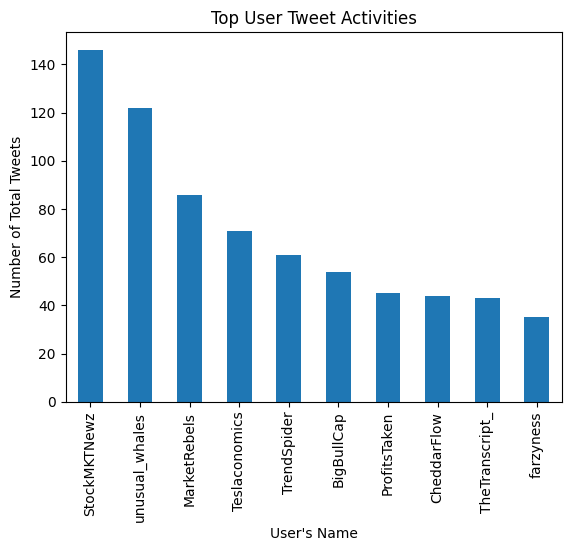

In [41]:
counts = crawled_tweets["writer"].value_counts(ascending= False)
countsFilter = counts[:10]
countsFilter.plot(kind="bar")

plt.title("Top User Tweet Activities")
plt.ylabel("Number of Total Tweets")
plt.xlabel("User's Name")
plt.show()

Graph above shows active users/writers

<AxesSubplot: ylabel='ticker_symbol'>

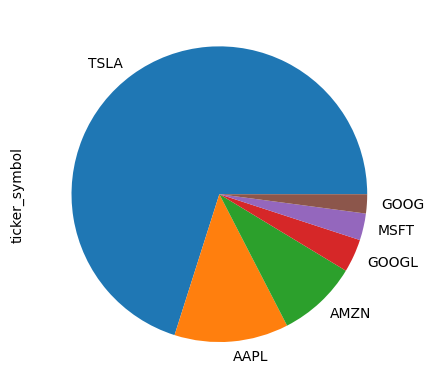

In [42]:
counts = filterTweets["ticker_symbol"].value_counts()
counts.plot(kind="pie")

<AxesSubplot: ylabel='ticker_symbol'>

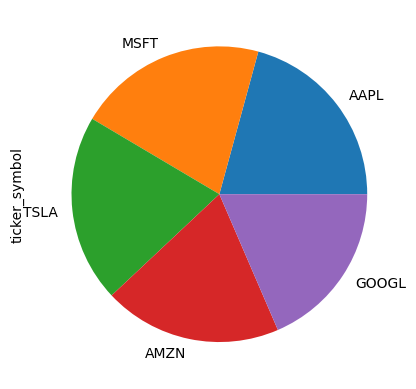

In [43]:
counts = crawled_tweets["ticker_symbol"].value_counts()
counts.plot(kind="pie")

Notice that there are more TSLA tweets in the dataset.

### Active Tweets dates

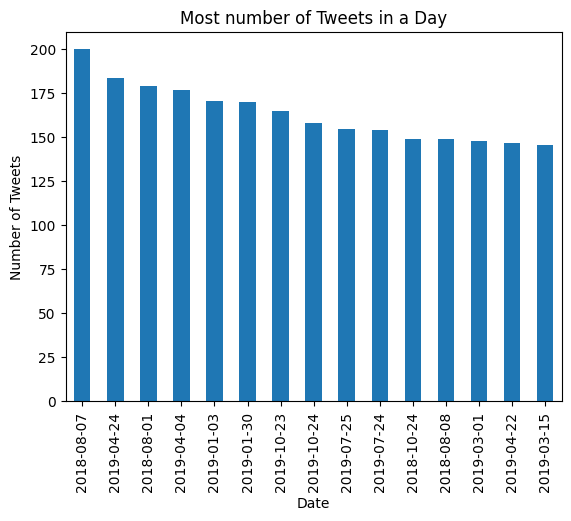

In [44]:
count = filterTweets["post_date"].value_counts(ascending = False)
count
filterCounts = count[:15]
filterCounts.plot(kind = "bar")
plt.title("Most number of Tweets in a Day")
plt.ylabel("Number of Tweets")
plt.xlabel("Date")
plt.show()

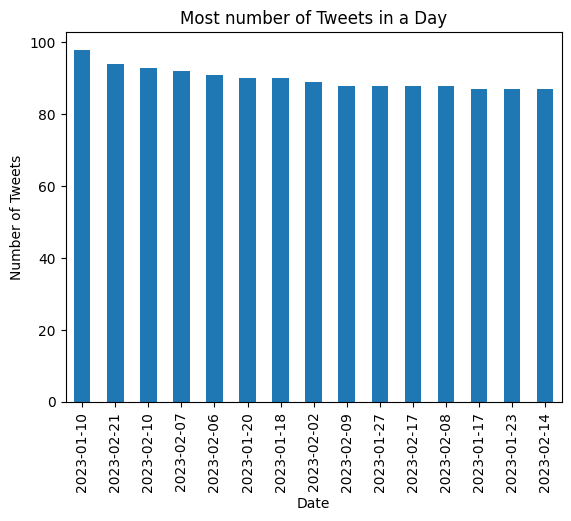

In [45]:
count = crawled_tweets["post_date"].value_counts(ascending = False)
count
filterCounts = count[:15]
filterCounts.plot(kind = "bar")
plt.title("Most number of Tweets in a Day")
plt.ylabel("Number of Tweets")
plt.xlabel("Date")
plt.show()

Above bar graphs shows the highest tweets in the respective days

### Word Cloud of Tweets

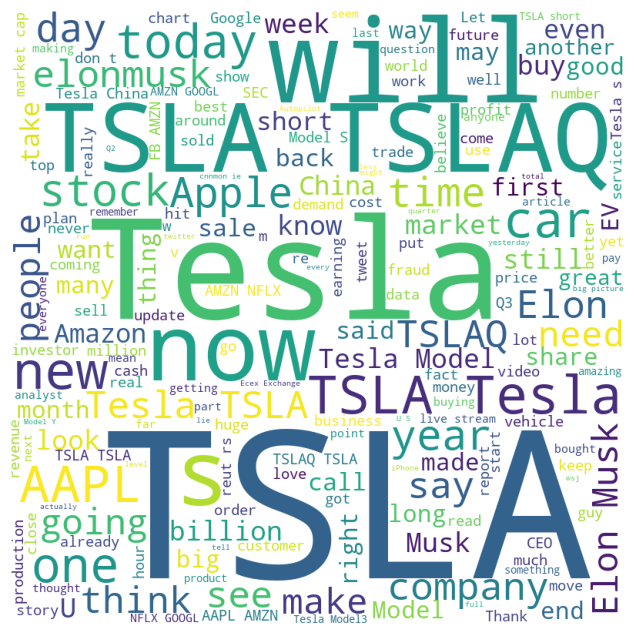

In [46]:
text = " ".join(filterTweets["body"])
wordcloud = WordCloud(width = 800, height = 800, background_color='white', max_words = 200)
wordcloud.generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

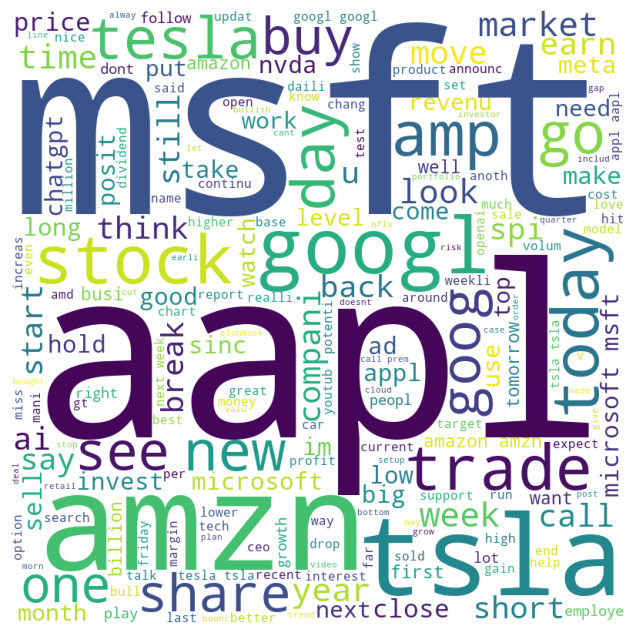

In [47]:
text = " ".join(crawled_tweets["clean_text"])
wordcloud = WordCloud(width = 800, height = 800, background_color='white', max_words = 200)
wordcloud.generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

From the word cloud we can tell that tsla aapl msft are common tweets in Twitter

In [48]:
filterTweets.head()

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,preprocessed_text,sentiment,subjectivity,sentiment_category,subjectivity_category
16050,3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...,0.7783,0.457143,1,0
29670,4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on ga you own it f...,0.0000,0.400000,0,0
39968,4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...,0.5106,0.900000,1,1
10501,2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...,-0.4939,0.600000,-1,1
33022,4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,i think is basic financi insan to buy anyth ex...,0.2350,0.383333,1,0


### Convert Positive, Negative and Neutral to numeral labels and Subjectivity

### Splitting up data for Prediction using ensemble machine learning models For Blob Subjectivity and Polarity Analysis

In [49]:
X = filterTweets["preprocessed_text"].values 
y = filterTweets[["sentiment_category"]].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [50]:
X_no = filterTweets["preprocessed_text"].values 
y_no = filterTweets[["sentiment_category"]].values
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(
    X_no, y_no, test_size=0.20, random_state=0)

In [51]:
X_lemma = filterTweetsLemma["preprocessed_text"].values 
y_lemma = filterTweetsLemma[["sentiment_category"]].values
X_train_lemma, X_test_lemma, y_train_lemma, y_test_lemma = train_test_split(
    X_lemma, y_lemma, test_size=0.20, random_state=0)

In [52]:
X_subj = filterTweets["preprocessed_text"].values 
y_subj = filterTweets["subjectivity_category"].values
X_train_subj, X_test_subj, y_train_subj, y_test_subj = train_test_split(
    X_subj, y_subj, test_size=0.20, random_state=0)

In [53]:
X_subj_no = filterTweetsNo["preprocessed_text"].values 
y_subj_no = filterTweetsNo["subjectivity_category"].values
X_train_subj_no, X_test_subj_no, y_train_subj_no, y_test_subj_no = train_test_split(
    X_subj_no, y_subj_no, test_size=0.20, random_state=0)

In [54]:
X_subj_lemma = filterTweetsLemma["preprocessed_text"].values 
y_subj_lemma = filterTweetsLemma["subjectivity_category"].values
X_train_subj_lemma, X_test_subj_lemma, y_train_subj_lemma, y_test_subj_lemma = train_test_split(
    X_subj_lemma, y_subj_lemma, test_size=0.20, random_state=0)

In [55]:
filterTweets["subjectivity_category"].value_counts()

0    28169
1    13456
Name: subjectivity_category, dtype: int64

### Evaluation Data -> Crawled and labelled data

In [56]:
#Evluation Data for Subjectivity
eval_data_x = crawled_tweets['preprocessed_text'].values
eval_data_x_lemma = crawled_tweets_lemma['preprocessed_text'].values
eval_data_y = crawled_tweets['subjectivity_category'].values
eval_data_y_lemma = crawled_tweets_lemma['subjectivity_category'].values
eval_data_x_no = crawledTweetsNo['preprocessed_text'].values
eval_data_y_no = crawledTweetsNo['subjectivity_category'].values


In [57]:
def metric_report(y_test,y_pred,time,no_record_x_test,y_eval, y_pred_eval,time_eval,no_record_x_eval):
    accuracy = accuracy_score(y_test,y_pred)
    fmeasure = f1_score(y_test,y_pred, average = "weighted", zero_division = 1)
    recall = recall_score(y_test, y_pred, average = "weighted",zero_division = 1)
    precision = precision_score(y_test, y_pred, average = "weighted",zero_division = 1)

    
    print(f"Model Metrics with testing data")
    print(f"The accuracy of the Model is {accuracy}")
    print(f"The F-Score of the Model is {fmeasure}")
    print(f"The Recall of the Model is {recall}")
    print(f"The precision of the Model is {precision}")
    print(f"The time taken for the Model prediction is {time} seconds")
    print(f"The number of records per second is {no_record_x_test//time}")
    print(f"================================================================")
    

    accuracy_eval = accuracy_score(y_eval,y_pred_eval)
    fmeasure_eval = f1_score(y_eval,y_pred_eval, average = "weighted", zero_division = 1)
    recall_eval = recall_score(y_eval, y_pred_eval, average = "weighted",zero_division = 1)
    precision_eval = precision_score(y_eval, y_pred_eval, average = "weighted",zero_division = 1)
    print(f"Model Metrics with evaluation data")
    print(f"The accuracy of the Model is {accuracy_eval}")
    print(f"The F-Score of the Model is {fmeasure_eval}")
    print(f"The Recall of the Model is {recall_eval}")
    print(f"The precision of the Model is {precision_eval}")
    print(f"The time taken for the Model prediction is {time_eval} seconds")
    print(f"The number of records per second is {no_record_x_eval//time_eval}")

In [58]:
def metric_report_noeval(y_test,y_pred,time,no_record_x_test):
    accuracy = accuracy_score(y_test,y_pred)
    fmeasure = f1_score(y_test,y_pred, average = "weighted", zero_division = 1)
    recall = recall_score(y_test, y_pred, average = "weighted",zero_division = 1)
    precision = precision_score(y_test, y_pred, average = "weighted",zero_division = 1)

    
    print(f"Model Metrics with testing data")
    print(f"The accuracy of the Model is {accuracy}")
    print(f"The F-Score of the Model is {fmeasure}")
    print(f"The Recall of the Model is {recall}")
    print(f"The precision of the Model is {precision}")
    print(f"The time taken for the Model prediction is {time} seconds")
    print(f"The number of records per second is {no_record_x_test//time}")
    print(f"================================================================")

### Vectorise and TFIDF train and test datas

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [60]:
# Create Count Vectorizer (TF)
vectoriser = CountVectorizer()

# For blob analysis dataset that have been stemmed

X_train_vec = vectoriser.fit_transform(X_train)
X_test_vec = vectoriser.transform(X_test)
eval_data_x_vec = vectoriser.transform(eval_data_x)

X_train_no_vec = vectoriser.fit_transform(X_train_no)
X_test_no_vec = vectoriser.transform(X_test_no)
eval_data_x_no_vec= vectoriser.transform(eval_data_x_no)


# For blob analysis dataset that have been lemmatised
X_train_lemma_vec = vectoriser.fit_transform(X_train_lemma)
X_test_lemma_vec = vectoriser.transform(X_test_lemma)
eval_data_x_lemma_vec = vectoriser.transform(eval_data_x_lemma)




# For Subjectivity Blob Analysis Vectorised
X_train_subj_vec = vectoriser.fit_transform(X_train_subj)
X_test_subj_vec = vectoriser.transform(X_test_subj)
eval_data_x_subj_vec = vectoriser.transform(eval_data_x)

X_train_subj_no_vec = vectoriser.fit_transform(X_train_subj_no)
X_test_subj_no_vec = vectoriser.transform(X_test_subj_no)
eval_data_x_subj_no_vec = vectoriser.transform(eval_data_x_no)

X_train_subj_lemma_vec = vectoriser.fit_transform(X_train_subj_lemma)
X_test_subj_lemma_vec = vectoriser.transform(X_test_subj_lemma)
eval_data_x_subj_lemma_vec = vectoriser.transform(eval_data_x_lemma)


# Create TFID Vectorizer 
vectoriser_tfidf = TfidfVectorizer()
# For blob analysis dataset that have been stemmed


X_train_tfidf = vectoriser_tfidf.fit_transform(X_train)
X_test_tfidf = vectoriser_tfidf.transform(X_test)
eval_data_x_tfidf = vectoriser_tfidf.transform(eval_data_x)

X_train_no_tfidf = vectoriser_tfidf.fit_transform(X_train_no)
X_test_no_tfidf = vectoriser_tfidf.transform(X_test_no)
eval_data_x_no_tfidf = vectoriser_tfidf.transform(eval_data_x_no)

# For blob analysis dataset  that have been lemmatised


X_train_lemma_tfidf = vectoriser_tfidf.fit_transform(X_train_lemma)
X_test_lemma_tfidf = vectoriser_tfidf.transform(X_test_lemma)
eval_data_x_lemma_tfidf = vectoriser_tfidf.transform(eval_data_x_lemma)



# For Subjectivity Blob Analysis TFIDF
X_train_subj_tfidf = vectoriser_tfidf.fit_transform(X_train_subj)
X_test_subj_tfidf = vectoriser_tfidf.transform(X_test_subj)
eval_data_x_subj_tfidf = vectoriser_tfidf.transform(eval_data_x)


X_train_subj_lemma_tfidf = vectoriser_tfidf.fit_transform(X_train_subj_lemma)
X_test_subj_lemma_tfidf = vectoriser_tfidf.transform(X_test_subj_lemma)
eval_data_x_subj_lemma_tfidf = vectoriser_tfidf.transform(eval_data_x_lemma)

X_train_subj_no_tfidf = vectoriser_tfidf.fit_transform(X_train_subj_no)
X_test_subj_no_tfidf = vectoriser_tfidf.transform(X_test_subj_no)
eval_data_x_subj_no_tfidf = vectoriser_tfidf.transform(eval_data_x_no)





## Doing up Machine Learning Models for TextBlob Analysis

## Subjectivity Prediction

In [61]:
def lr_clf(X_train, y_train, X_test, y_test,x_eval,y_eval):
    # Train the model using Naive Bayes algorithm
    clf = LogisticRegression(max_iter = 1000)
    test_size = len(y_test)
    clf.fit(X_train, y_train)
    # Make predictions on test data
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    
    metric_report(y_test,y_pred,time_taken,test_size, y_eval,y_pred_eval,time_taken_eval,len(y_eval))
    
    

In [62]:
# Decision Tree Classifier (subjectivity) for Stemmed Dataset and vectorised
lr_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj,eval_data_x_subj_vec,eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8821621621621621
The F-Score of the Model is 0.8804057165078369
The Recall of the Model is 0.8821621621621621
The precision of the Model is 0.8808096260067695
The time taken for the Model prediction is 0.0009970664978027344 seconds
The number of records per second is 8349493.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8832014890646812
The F-Score of the Model is 0.8795560735547576
The Recall of the Model is 0.8832014890646812
The precision of the Model is 0.8809583274878364
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 429799999.0


In [63]:
# Decision Tree Classifier (subjectivity) for lemmatised Dataset and vectorised
lr_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma,eval_data_x_subj_lemma_vec,eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.9084684684684685
The F-Score of the Model is 0.9071988059649634
The Recall of the Model is 0.9084684684684685
The precision of the Model is 0.9079014976847787
The time taken for the Model prediction is 0.000997304916381836 seconds
The number of records per second is 8347497.0
Model Metrics with evaluation data
The accuracy of the Model is 0.9060027919962773
The F-Score of the Model is 0.9034976478016369
The Recall of the Model is 0.9060027919962773
The precision of the Model is 0.9049468322004177
The time taken for the Model prediction is 0.000997781753540039 seconds
The number of records per second is 4307555.0


In [64]:
lr_clf(X_train_subj_no_vec,y_train_subj_no,X_test_subj_no_vec,y_test_subj_no,eval_data_x_subj_no_vec,eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.8993393393393393
The F-Score of the Model is 0.8982295716672728
The Recall of the Model is 0.8993393393393393
The precision of the Model is 0.8983863485386692
The time taken for the Model prediction is 0.000997304916381836 seconds
The number of records per second is 8347497.0
Model Metrics with evaluation data
The accuracy of the Model is 0.908096789204281
The F-Score of the Model is 0.9057575934459536
The Recall of the Model is 0.908096789204281
The precision of the Model is 0.907064555262357
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 429799999.0


In [65]:
# Decision Tree Classifier (subjectivity) for stemmed Dataset and tfidf
lr_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj,eval_data_x_subj_tfidf,eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8609009009009009
The F-Score of the Model is 0.8552239433755978
The Recall of the Model is 0.8609009009009009
The precision of the Model is 0.8620963713758458
The time taken for the Model prediction is 0.0009970664978027344 seconds
The number of records per second is 8349493.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8694741740344346
The F-Score of the Model is 0.8609388831955993
The Recall of the Model is 0.8694741740344346
The precision of the Model is 0.8708350963553514
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 429799999.0


In [66]:
# Decision Tree Classifier (subjectivity) for lemmatised Dataset and tfidf
lr_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma,eval_data_x_subj_lemma_tfidf,eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8723123123123123
The F-Score of the Model is 0.8669252362071869
The Recall of the Model is 0.8723123123123123
The precision of the Model is 0.8751139393361617
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 832499999.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8759888320148906
The F-Score of the Model is 0.8676524789861362
The Recall of the Model is 0.8759888320148906
The precision of the Model is 0.8789827809029939
The time taken for the Model prediction is 0.000997304916381836 seconds
The number of records per second is 4309614.0


In [67]:
lr_clf(X_train_subj_no_tfidf,y_train_subj_no,X_test_subj_no_tfidf,y_test_subj_no,eval_data_x_subj_no_tfidf,eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.8639039039039039
The F-Score of the Model is 0.8578710061082516
The Recall of the Model is 0.8639039039039039
The precision of the Model is 0.8663841355974807
The time taken for the Model prediction is 0.0009975433349609375 seconds
The number of records per second is 8345502.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8704048394602141
The F-Score of the Model is 0.8609648788642522
The Recall of the Model is 0.8704048394602141
The precision of the Model is 0.8738640644666102
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 429799999.0


### Naive Bayes ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [68]:
def multi_nb_clf(X_train, y_train, X_test, y_test,x_eval, y_eval):
    # Train the model using Naive Bayes algorithm
    clf = MultinomialNB()
    test_size = len(y_test)
    clf.fit(X_train, y_train)
    # Make predictions on test data
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,y_pred,time_taken,test_size,y_eval,y_pred_eval,time_taken_eval,len(y_eval))
    
    

In [69]:
# Naive Bayes for Stemmed Dataset and Vectorised
multi_nb_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj,eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.7869069069069069
The F-Score of the Model is 0.7871139107824324
The Recall of the Model is 0.7869069069069069
The precision of the Model is 0.7873304771438105
The time taken for the Model prediction is 0.000997781753540039 seconds
The number of records per second is 8343507.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8178222429036761
The F-Score of the Model is 0.8042906475090247
The Recall of the Model is 0.8178222429036761
The precision of the Model is 0.8107530916798734
The time taken for the Model prediction is 0.0009963512420654297 seconds
The number of records per second is 4313739.0


In [70]:
# Naive Bayes for Lemmatised and Vectorised
multi_nb_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma,eval_data_x_subj_lemma_vec, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8004804804804805
The F-Score of the Model is 0.8005097695366679
The Recall of the Model is 0.8004804804804805
The precision of the Model is 0.8005392793713523
The time taken for the Model prediction is 0.001993894577026367 seconds
The number of records per second is 4175245.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8261982317356911
The F-Score of the Model is 0.8131213309206935
The Recall of the Model is 0.8261982317356911
The precision of the Model is 0.8209964090236952
The time taken for the Model prediction is 0.0009980201721191406 seconds
The number of records per second is 4306526.0


In [71]:
multi_nb_clf(X_train_subj_no_vec,y_train_subj_no,X_test_subj_no_vec,y_test_subj_no,eval_data_x_subj_no_vec, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.7798198198198198
The F-Score of the Model is 0.7830996132050395
The Recall of the Model is 0.7798198198198198
The precision of the Model is 0.7892965898718699
The time taken for the Model prediction is 0.002001047134399414 seconds
The number of records per second is 4160321.0
Model Metrics with evaluation data
The accuracy of the Model is 0.806654257794323
The F-Score of the Model is 0.7953876335190984
The Recall of the Model is 0.806654257794323
The precision of the Model is 0.7968674134852796
The time taken for the Model prediction is 0.0009627342224121094 seconds
The number of records per second is 4464368.0


In [72]:
# Naive Bayes for stemmed crawled dataset and TFIDF
multi_nb_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj,eval_data_x_subj_tfidf,eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.7111111111111111
The F-Score of the Model is 0.6225322693929429
The Recall of the Model is 0.7111111111111111
The precision of the Model is 0.7751370939659973
The time taken for the Model prediction is 0.001995086669921875 seconds
The number of records per second is 4172751.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7408096789204281
The F-Score of the Model is 0.6449312505862007
The Recall of the Model is 0.7408096789204281
The precision of the Model is 0.8011061795291267
The time taken for the Model prediction is 0.000997304916381836 seconds
The number of records per second is 4309614.0


In [73]:
# Naive Bayes for lemmatised crawled dataset and TFIDF
multi_nb_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma,eval_data_x_subj_lemma_tfidf,eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.7147147147147147
The F-Score of the Model is 0.628453448322597
The Recall of the Model is 0.7147147147147147
The precision of the Model is 0.7844672269005357
The time taken for the Model prediction is 0.001995086669921875 seconds
The number of records per second is 4172751.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7396463471382038
The F-Score of the Model is 0.6420520899161142
The Recall of the Model is 0.7396463471382038
The precision of the Model is 0.8039615595141278
The time taken for the Model prediction is 0.0009961128234863281 seconds
The number of records per second is 4314772.0


In [74]:
multi_nb_clf(X_train_subj_no_tfidf,y_train_subj_no,X_test_subj_no_tfidf,y_test_subj_no,eval_data_x_subj_no_tfidf, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.7231231231231231
The F-Score of the Model is 0.6465833026818739
The Recall of the Model is 0.7231231231231231
The precision of the Model is 0.7810901540526486
The time taken for the Model prediction is 0.001996755599975586 seconds
The number of records per second is 4169263.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7415076779897627
The F-Score of the Model is 0.6464296391962617
The Recall of the Model is 0.7415076779897627
The precision of the Model is 0.8018265570703834
The time taken for the Model prediction is 0.0009968280792236328 seconds
The number of records per second is 4311676.0


### Create Decision Tree ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [75]:
def dt_clf(X_train, y_train, X_test,y_test,x_eval, y_eval):
    clf = DecisionTreeClassifier()
    clf.fit(X_train,y_train)
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,y_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))

In [76]:
# Decision Tree Classifier (subjectivity) for Stemmed Dataset and vectorised
dt_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8181381381381382
The F-Score of the Model is 0.8185740378882773
The Recall of the Model is 0.8181381381381382
The precision of the Model is 0.819072767490998
The time taken for the Model prediction is 0.007978677749633789 seconds
The number of records per second is 1043405.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8159609120521173
The F-Score of the Model is 0.8185561096293003
The Recall of the Model is 0.8159609120521173
The precision of the Model is 0.8224494859208679
The time taken for the Model prediction is 0.003991603851318359 seconds
The number of records per second is 1076760.0


In [77]:
# Decision Tree Classifier (subjectivity) for lemmatised Dataset and vectorised
dt_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma, eval_data_x_subj_lemma_vec, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8347147147147147
The F-Score of the Model is 0.8357233584879866
The Recall of the Model is 0.8347147147147147
The precision of the Model is 0.8371773245363896
The time taken for the Model prediction is 0.006949663162231445 seconds
The number of records per second is 1197899.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8292228943694742
The F-Score of the Model is 0.8322660494990747
The Recall of the Model is 0.8292228943694742
The precision of the Model is 0.8375350410583999
The time taken for the Model prediction is 0.00501704216003418 seconds
The number of records per second is 856680.0


In [78]:
dt_clf(X_train_subj_no_vec,y_train_subj_no,X_test_subj_no_vec,y_test_subj_no, eval_data_x_subj_no_vec, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.8285885885885886
The F-Score of the Model is 0.8296271547091465
The Recall of the Model is 0.8285885885885886
The precision of the Model is 0.8311001148552523
The time taken for the Model prediction is 0.006982088088989258 seconds
The number of records per second is 1192336.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8308515588645882
The F-Score of the Model is 0.8327064090388647
The Recall of the Model is 0.8308515588645882
The precision of the Model is 0.8353403794190032
The time taken for the Model prediction is 0.003022909164428711 seconds
The number of records per second is 1421809.0


In [79]:
# Decision Tree Classifier (subjectivity) for stemmed Dataset and tfidf
dt_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj,eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8111711711711712
The F-Score of the Model is 0.8119373985718082
The Recall of the Model is 0.8111711711711712
The precision of the Model is 0.8128865601363152
The time taken for the Model prediction is 0.0080108642578125 seconds
The number of records per second is 1039213.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7894369474174034
The F-Score of the Model is 0.7911553623816311
The Recall of the Model is 0.7894369474174034
The precision of the Model is 0.7932586917497468
The time taken for the Model prediction is 0.003956317901611328 seconds
The number of records per second is 1086363.0


In [80]:
# Decision Tree Classifier (subjectivity) for lemmatised Dataset and tfidf
dt_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma, eval_data_x_subj_lemma_tfidf, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8301501501501501
The F-Score of the Model is 0.8308393648731153
The Recall of the Model is 0.8301501501501501
The precision of the Model is 0.8317172998048122
The time taken for the Model prediction is 0.009942054748535156 seconds
The number of records per second is 837352.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8215449046067939
The F-Score of the Model is 0.824022249666967
The Recall of the Model is 0.8215449046067939
The precision of the Model is 0.8277680000639674
The time taken for the Model prediction is 0.005021095275878906 seconds
The number of records per second is 855988.0


In [81]:
dt_clf(X_train_subj_no_tfidf,y_train_subj_no,X_test_subj_no_tfidf,y_test_subj_no, eval_data_x_subj_no_tfidf, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.8130930930930931
The F-Score of the Model is 0.8134353632751152
The Recall of the Model is 0.8130930930930931
The precision of the Model is 0.8138136726474152
The time taken for the Model prediction is 0.008976936340332031 seconds
The number of records per second is 927376.0
Model Metrics with evaluation data
The accuracy of the Model is 0.814797580269893
The F-Score of the Model is 0.8153266440104346
The Recall of the Model is 0.814797580269893
The precision of the Model is 0.8159027707473853
The time taken for the Model prediction is 0.002991199493408203 seconds
The number of records per second is 1436881.0


### Random Forest ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [82]:
def rf_clf(X_train, y_train, X_test, y_test, x_eval, y_eval):
    
    clf = RandomForestClassifier()
    clf.fit(X_train,y_train)
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,y_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))


In [83]:
# Random Forest Classifier (subjectivity) for Stemmed Dataset and vectorised
rf_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8278678678678678
The F-Score of the Model is 0.8163328531490343
The Recall of the Model is 0.8278678678678678
The precision of the Model is 0.8319199766555502
The time taken for the Model prediction is 0.5113449096679688 seconds
The number of records per second is 16280.0
Model Metrics with evaluation data
The accuracy of the Model is 0.819683573755235
The F-Score of the Model is 0.7996881276313205
The Recall of the Model is 0.819683573755235
The precision of the Model is 0.8196314866016674
The time taken for the Model prediction is 0.26102232933044434 seconds
The number of records per second is 16466.0


In [84]:
# Random Forest Classifier (subjectivity) for lemmatised Dataset and vectorised
rf_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma,eval_data_x_subj_lemma_vec, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8414414414414414
The F-Score of the Model is 0.8324032249376476
The Recall of the Model is 0.8414414414414414
The precision of the Model is 0.8446751210388229
The time taken for the Model prediction is 0.5847554206848145 seconds
The number of records per second is 14236.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8299208934388087
The F-Score of the Model is 0.8128047886899274
The Recall of the Model is 0.8299208934388087
The precision of the Model is 0.8306472938476639
The time taken for the Model prediction is 0.30443835258483887 seconds
The number of records per second is 14117.0


In [85]:
rf_clf(X_train_subj_no_vec,y_train_subj_no,X_test_subj_no_vec,y_test_subj_no, eval_data_x_subj_no_vec, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.836036036036036
The F-Score of the Model is 0.8270038809550152
The Recall of the Model is 0.836036036036036
The precision of the Model is 0.8378620294713318
The time taken for the Model prediction is 0.5669524669647217 seconds
The number of records per second is 14683.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8189855746859004
The F-Score of the Model is 0.8001096395269873
The Recall of the Model is 0.8189855746859004
The precision of the Model is 0.8170910102464468
The time taken for the Model prediction is 0.2919175624847412 seconds
The number of records per second is 14723.0


In [86]:
# Random Forest Classifier (subjectivity) for Stemmed Dataset and tfidf
rf_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj, eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8225825825825825
The F-Score of the Model is 0.8068553300362619
The Recall of the Model is 0.8225825825825825
The precision of the Model is 0.8337547668813241
The time taken for the Model prediction is 0.5173842906951904 seconds
The number of records per second is 16090.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8092135877152163
The F-Score of the Model is 0.7801533265457733
The Recall of the Model is 0.8092135877152163
The precision of the Model is 0.8176475812362145
The time taken for the Model prediction is 0.26508545875549316 seconds
The number of records per second is 16213.0


In [87]:
# Random Forest Classifier (subjectivity) for lemmatised Dataset and tfidf
rf_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma, eval_data_x_subj_lemma_tfidf,eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8190990990990991
The F-Score of the Model is 0.8023353929288337
The Recall of the Model is 0.8190990990990991
The precision of the Model is 0.8310553527489289
The time taken for the Model prediction is 0.5666699409484863 seconds
The number of records per second is 14691.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8101442531409958
The F-Score of the Model is 0.782021029728448
The Recall of the Model is 0.8101442531409958
The precision of the Model is 0.8175134993322037
The time taken for the Model prediction is 0.2919483184814453 seconds
The number of records per second is 14721.0


In [88]:
rf_clf(X_train_subj_no_tfidf,y_train_subj_no,X_test_subj_no_tfidf,y_test_subj_no, eval_data_x_subj_no_tfidf, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.8216216216216217
The F-Score of the Model is 0.8051538417325605
The Recall of the Model is 0.8216216216216217
The precision of the Model is 0.8341771765256777
The time taken for the Model prediction is 0.5677022933959961 seconds
The number of records per second is 14664.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8029315960912052
The F-Score of the Model is 0.7687882110944434
The Recall of the Model is 0.8029315960912052
The precision of the Model is 0.8160541635515471
The time taken for the Model prediction is 0.2849431037902832 seconds
The number of records per second is 15083.0


### Ensemble Learning

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [89]:
def ensemble_clf(X_train, y_train, X_test, y_test, x_eval, y_eval):
    clf1 = DecisionTreeClassifier()
    clf2 = RandomForestClassifier()
    clf3 = SVC()

    # Create the ensemble classifier
    ensemble = VotingClassifier(estimators=[('dt', clf1), ('rf', clf2), ('svc', clf3)], voting='hard')
    
    # Train the ensemble classifier
    ensemble.fit(X_train,y_train)
    start_time = time.time()
    # Make predictions on the test set
    y_pred = ensemble.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = ensemble.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,y_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))

In [90]:
# Ensemble Classifier (subjectivity) for stemmed Dataset and vectorised
ensemble_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.856936936936937
The F-Score of the Model is 0.8516528380227584
The Recall of the Model is 0.856936936936937
The precision of the Model is 0.8568531126216132
The time taken for the Model prediction is 35.604766845703125 seconds
The number of records per second is 233.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8534201954397395
The F-Score of the Model is 0.8445899745919404
The Recall of the Model is 0.8534201954397395
The precision of the Model is 0.8510821619039304
The time taken for the Model prediction is 17.738385915756226 seconds
The number of records per second is 242.0


In [91]:
# Ensemble Classifier (subjectivity) for lemmatised Dataset and vectorised
ensemble_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma, eval_data_x_subj_lemma_vec, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.863063063063063
The F-Score of the Model is 0.8580795597773966
The Recall of the Model is 0.863063063063063
The precision of the Model is 0.8634325393979184
The time taken for the Model prediction is 32.81667733192444 seconds
The number of records per second is 253.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8610981852024198
The F-Score of the Model is 0.853422835934242
The Recall of the Model is 0.8610981852024198
The precision of the Model is 0.85916087714676
The time taken for the Model prediction is 16.18054223060608 seconds
The number of records per second is 265.0


In [92]:
ensemble_clf(X_train_subj_no_vec,y_train_subj_no,X_test_subj_no_vec,y_test_subj_no, eval_data_x_subj_no_vec, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.8592192192192192
The F-Score of the Model is 0.854397629683841
The Recall of the Model is 0.8592192192192192
The precision of the Model is 0.858811464222679
The time taken for the Model prediction is 35.38539958000183 seconds
The number of records per second is 235.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8548161935784085
The F-Score of the Model is 0.8454870146508539
The Recall of the Model is 0.8548161935784085
The precision of the Model is 0.8533795765254132
The time taken for the Model prediction is 17.37278985977173 seconds
The number of records per second is 247.0


In [93]:
# Ensemble Classifier (subjectivity) for stemmed Dataset and tfidf
ensemble_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj, eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8651051051051051
The F-Score of the Model is 0.8594139607344036
The Recall of the Model is 0.8651051051051051
The precision of the Model is 0.8671157824491158
The time taken for the Model prediction is 33.15398097038269 seconds
The number of records per second is 251.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8566775244299675
The F-Score of the Model is 0.8459284894939536
The Recall of the Model is 0.8566775244299675
The precision of the Model is 0.8578630400403575
The time taken for the Model prediction is 16.43197774887085 seconds
The number of records per second is 261.0


In [94]:
# Ensemble Classifier (subjectivity) for lemmatised Dataset and tfidf

ensemble_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma, eval_data_x_subj_lemma_tfidf, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8727927927927928
The F-Score of the Model is 0.8676726890786962
The Recall of the Model is 0.8727927927927928
The precision of the Model is 0.8750817278369776
The time taken for the Model prediction is 33.716965675354004 seconds
The number of records per second is 246.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8664495114006515
The F-Score of the Model is 0.8578074197962022
The Recall of the Model is 0.8664495114006515
The precision of the Model is 0.8671236851610199
The time taken for the Model prediction is 16.75092124938965 seconds
The number of records per second is 256.0


In [95]:
ensemble_clf(X_train_subj_no_tfidf,y_train_subj_no,X_test_subj_no_tfidf,y_test_subj_no, eval_data_x_subj_no_tfidf, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.863063063063063
The F-Score of the Model is 0.8570496352889477
The Recall of the Model is 0.863063063063063
The precision of the Model is 0.8653269276938881
The time taken for the Model prediction is 36.275516748428345 seconds
The number of records per second is 229.0
Model Metrics with evaluation data
The accuracy of the Model is 0.862261516984644
The F-Score of the Model is 0.8512573125091578
The Recall of the Model is 0.862261516984644
The precision of the Model is 0.8659709614989021
The time taken for the Model prediction is 17.959469079971313 seconds
The number of records per second is 239.0


### Support Vector Machine Model

In [96]:
def svm_clf(X_train,y_train,X_test, y_test, x_eval , y_eval):
    
    clf = SVC(kernel = "rbf", random_state = 1)
    clf.fit(X_train,y_train)
    start_time = time.time()
    svm_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    svm_pred = (svm_pred >= 0.5).astype(int)
    y_pred_eval = (y_pred_eval >= 0.5).astype(int)
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,svm_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))

In [97]:
# SVM Classifier (subjectivity) for stemmed Dataset and vectorised

svm_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8590990990990991
The F-Score of the Model is 0.8531775152514294
The Recall of the Model is 0.8590990990990991
The precision of the Model is 0.8604088860417719
The time taken for the Model prediction is 32.05477547645569 seconds
The number of records per second is 259.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8585388552815263
The F-Score of the Model is 0.8500792226600837
The Recall of the Model is 0.8585388552815263
The precision of the Model is 0.856942545612737
The time taken for the Model prediction is 15.774436950683594 seconds
The number of records per second is 272.0


In [98]:
# SVM Classifier (subjectivity) for lemmatised Dataset and vectorised
svm_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma, eval_data_x_subj_lemma_vec, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8639039039039039
The F-Score of the Model is 0.8583165961089018
The Recall of the Model is 0.8639039039039039
The precision of the Model is 0.8654792506229574
The time taken for the Model prediction is 32.37462043762207 seconds
The number of records per second is 257.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8650535132619823
The F-Score of the Model is 0.8569834689849483
The Recall of the Model is 0.8650535132619823
The precision of the Model is 0.8644866449444272
The time taken for the Model prediction is 15.940259218215942 seconds
The number of records per second is 269.0


In [99]:
svm_clf(X_train_subj_no_vec,y_train_subj_no,X_test_subj_no_vec,y_test_subj_no, eval_data_x_subj_no_vec, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.8575375375375376
The F-Score of the Model is 0.8514222884052262
The Recall of the Model is 0.8575375375375376
The precision of the Model is 0.8589055497995107
The time taken for the Model prediction is 34.499634981155396 seconds
The number of records per second is 241.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8576081898557468
The F-Score of the Model is 0.8472021628948873
The Recall of the Model is 0.8576081898557468
The precision of the Model is 0.8585281823563655
The time taken for the Model prediction is 17.32656192779541 seconds
The number of records per second is 248.0


In [100]:
# SVM Classifier (subjectivity) for stemmed Dataset and tfidf
svm_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj, eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8803603603603604
The F-Score of the Model is 0.8764607237010297
The Recall of the Model is 0.8803603603603604
The precision of the Model is 0.8813621938608033
The time taken for the Model prediction is 32.75517702102661 seconds
The number of records per second is 254.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8738948348068869
The F-Score of the Model is 0.8667374666547556
The Recall of the Model is 0.8738948348068869
The precision of the Model is 0.8740863878443285
The time taken for the Model prediction is 16.16863226890564 seconds
The number of records per second is 265.0


In [101]:
# SVM Classifier (subjectivity) for lemmatised Dataset and tfidf
svm_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma, eval_data_x_subj_lemma_tfidf, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.8905705705705705
The F-Score of the Model is 0.8871093328043796
The Recall of the Model is 0.8905705705705705
The precision of the Model is 0.8921476669890757
The time taken for the Model prediction is 33.09023594856262 seconds
The number of records per second is 251.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8845974872033504
The F-Score of the Model is 0.8780475709608094
The Recall of the Model is 0.8845974872033504
The precision of the Model is 0.8863744180312052
The time taken for the Model prediction is 16.294201850891113 seconds
The number of records per second is 263.0


In [102]:
svm_clf(X_train_subj_no_tfidf,y_train_subj_no,X_test_subj_no_tfidf,y_test_subj_no, eval_data_x_subj_no_tfidf, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.8810810810810811
The F-Score of the Model is 0.87693592544704
The Recall of the Model is 0.8810810810810811
The precision of the Model is 0.8827000071596892
The time taken for the Model prediction is 36.09742045402527 seconds
The number of records per second is 230.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8799441600744532
The F-Score of the Model is 0.8723917313030393
The Recall of the Model is 0.8799441600744532
The precision of the Model is 0.8824994686984011
The time taken for the Model prediction is 17.673643350601196 seconds
The number of records per second is 243.0


### Neural Network Model



In [103]:
def mlp_clf(X_train, y_train, X_test, y_test, x_eval, y_eval):
    clf = MLPClassifier(solver = "lbfgs", alpha = 1e-5, 
                    hidden_layer_sizes =(32,4), activation = 'relu', random_state=1, max_iter = 1000)
    
    clf.fit(X_train,y_train)
    start_time = time.time()
    nn_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    start_time_eval = time.time()
    y_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    
    nn_pred = (nn_pred >= 0.5).astype(int)
    y_pred_eval = (y_pred_eval >= 0.5).astype(int)
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    # Evaluate the model using accuracy score
    
    metric_report(y_test,nn_pred,time_taken,len(y_test),y_eval,y_pred_eval,time_taken_eval,len(y_eval))

In [104]:
# Multilayer Perceptron for Stemmed Dataset (subjectivity) and vectorised
mlp_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj, eval_data_x_subj_vec, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8687087087087088
The F-Score of the Model is 0.8686376083062572
The Recall of the Model is 0.8687087087087088
The precision of the Model is 0.8685698349762095
The time taken for the Model prediction is 0.005983591079711914 seconds
The number of records per second is 1391304.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8704048394602141
The F-Score of the Model is 0.8694221479925138
The Recall of the Model is 0.8704048394602141
The precision of the Model is 0.8687779949115824
The time taken for the Model prediction is 0.002950906753540039 seconds
The number of records per second is 1456501.0


In [105]:
# Multilayer Perceptron for lemmatised Dataset (subjectivity) and vectorised
mlp_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma, eval_data_x_subj_lemma_vec, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.9061861861861862
The F-Score of the Model is 0.9060038610732123
The Recall of the Model is 0.9061861861861862
The precision of the Model is 0.9058660123913806
The time taken for the Model prediction is 0.005953073501586914 seconds
The number of records per second is 1398437.0
Model Metrics with evaluation data
The accuracy of the Model is 0.9120521172638436
The F-Score of the Model is 0.9113472120915361
The Recall of the Model is 0.9120521172638436
The precision of the Model is 0.9110499973497413
The time taken for the Model prediction is 0.003472566604614258 seconds
The number of records per second is 1237701.0


In [106]:
mlp_clf(X_train_subj_no_vec,y_train_subj_no,X_test_subj_no_vec,y_test_subj_no, eval_data_x_subj_no_vec, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.8971771771771772
The F-Score of the Model is 0.8968986850439414
The Recall of the Model is 0.8971771771771772
The precision of the Model is 0.8967045382772304
The time taken for the Model prediction is 0.005983591079711914 seconds
The number of records per second is 1391304.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8997208003722662
The F-Score of the Model is 0.8988735154582546
The Recall of the Model is 0.8997208003722662
The precision of the Model is 0.8984677594528397
The time taken for the Model prediction is 0.002992391586303711 seconds
The number of records per second is 1436309.0


In [107]:
# Multilayer Perceptron for Stemmed Dataset (subjectivity) and tfidf
mlp_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj, eval_data_x_subj_tfidf, eval_data_y)

Model Metrics with testing data
The accuracy of the Model is 0.8368768768768768
The F-Score of the Model is 0.8377000696135182
The Recall of the Model is 0.8368768768768768
The precision of the Model is 0.838823283011215
The time taken for the Model prediction is 0.007957220077514648 seconds
The number of records per second is 1046219.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8203815728245696
The F-Score of the Model is 0.8199971838150065
The Recall of the Model is 0.8203815728245696
The precision of the Model is 0.8196382933467948
The time taken for the Model prediction is 0.0029916763305664062 seconds
The number of records per second is 1436652.0


In [108]:
# Multilayer Perceptron for lemmatised Dataset (subjectivity) and tfidf
mlp_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma, eval_data_x_subj_lemma_tfidf, eval_data_y_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.9007807807807808
The F-Score of the Model is 0.900623039573755
The Recall of the Model is 0.9007807807807808
The precision of the Model is 0.9004949664304979
The time taken for the Model prediction is 0.0060007572174072266 seconds
The number of records per second is 1387324.0
Model Metrics with evaluation data
The accuracy of the Model is 0.9071661237785016
The F-Score of the Model is 0.9060246249927882
The Recall of the Model is 0.9071661237785016
The precision of the Model is 0.9058055325389885
The time taken for the Model prediction is 0.0019779205322265625 seconds
The number of records per second is 2172989.0


In [109]:
mlp_clf(X_train_subj_no_tfidf,y_train_subj_no,X_test_subj_no_tfidf,y_test_subj_no, eval_data_x_subj_no_tfidf, eval_data_y_no)

Model Metrics with testing data
The accuracy of the Model is 0.6780780780780781
The F-Score of the Model is 0.5479958125627417
The Recall of the Model is 0.6780780780780781
The precision of the Model is 0.7817118018919821
The time taken for the Model prediction is 0.00679326057434082 seconds
The number of records per second is 1225479.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7259190321079572
The F-Score of the Model is 0.6106409760519887
The Recall of the Model is 0.7259190321079572
The precision of the Model is 0.8010394090685962
The time taken for the Model prediction is 0.0030646324157714844 seconds
The number of records per second is 1402452.0


### TensorFlow Subjectivity Machine Modeling

In [110]:
# Define the model architecture
model_vec2_subj = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_vec.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_tfidf
model_vec2_subj.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_subj_vec2.h5", save_best_only=True)

# Train the model_tfidf
history_vec2_subj = model_vec2_subj.fit(X_train_subj_vec, y_train_subj, epochs=7, batch_size=16, validation_data=(X_test_subj_vec, y_test_subj), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_vec2_subj.load_weights("model_polarity_subj_vec2.h5")
test_loss, test_acc = model_vec2_subj.evaluate(X_test_subj_vec, y_test_subj)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_vec2_subj.predict(X_test_subj_vec)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_vec2_subj.predict(eval_data_x_subj_vec)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_subj, y_pred,time_taken,len(y_test_subj), eval_data_y, y_pred_eval, time_taken_eval, len(eval_data_y))

Epoch 1/7
2082/2082 [==============================] - 26s 12ms/step - loss: 0.5344 - accuracy: 0.7750 - val_loss: 0.4244 - val_accuracy: 0.8590
Epoch 2/7
2082/2082 [==============================] - 27s 13ms/step - loss: 0.4261 - accuracy: 0.8630 - val_loss: 0.3975 - val_accuracy: 0.8748
Epoch 3/7
2082/2082 [==============================] - 26s 13ms/step - loss: 0.3890 - accuracy: 0.8849 - val_loss: 0.3977 - val_accuracy: 0.8794
Epoch 4/7
2082/2082 [==============================] - 27s 13ms/step - loss: 0.3693 - accuracy: 0.8956 - val_loss: 0.4003 - val_accuracy: 0.8798
Epoch 5/7
2082/2082 [==============================] - 27s 13ms/step - loss: 0.3556 - accuracy: 0.9023 - val_loss: 0.4047 - val_accuracy: 0.8843
Epoch 6/7
2082/2082 [==============================] - 26s 13ms/step - loss: 0.3535 - accuracy: 0.9042 - val_loss: 0.4038 - val_accuracy: 0.8813
Epoch 7/7
261/261 [==============================] - 1s 2ms/step - loss: 0.3975 - accuracy: 0.8748
Test loss: 0.3974792957305908
T

In [111]:
# Define the model architecture
model_vec2_lemma_subj = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_lemma_vec.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_vec
model_vec2_lemma_subj.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_subj_lemma_vec2.h5", save_best_only=True)

# Train the model_vec
history_vec2_subj_lemma = model_vec2_lemma_subj.fit(X_train_subj_lemma_vec, y_train_subj_lemma, epochs=10, batch_size=16, validation_data=(X_test_subj_lemma_vec, y_test_subj_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_vec on the test set
model_vec2_lemma_subj.load_weights("model_polarity_subj_lemma_vec2.h5")
test_loss, test_acc = model_vec2_lemma_subj.evaluate(X_test_subj_lemma_vec, y_test_subj_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)
start_time = time.time()
y_pred = model_vec2_lemma_subj.predict(X_test_subj_lemma_vec)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)
start_time_eval = time.time()
y_pred_eval = model_vec2_lemma_subj.predict(eval_data_x_subj_lemma_vec)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_subj_lemma, y_pred,time_taken,len(y_test_subj_lemma), eval_data_y_lemma, y_pred_eval,time_taken_eval, len(eval_data_y_lemma))

Epoch 1/10
2082/2082 [==============================] - 32s 15ms/step - loss: 0.5296 - accuracy: 0.7846 - val_loss: 0.4148 - val_accuracy: 0.8668
Epoch 2/10
2082/2082 [==============================] - 31s 15ms/step - loss: 0.4111 - accuracy: 0.8790 - val_loss: 0.3911 - val_accuracy: 0.8896
Epoch 3/10
2082/2082 [==============================] - 31s 15ms/step - loss: 0.3710 - accuracy: 0.9032 - val_loss: 0.3828 - val_accuracy: 0.8991
Epoch 4/10
2082/2082 [==============================] - 32s 15ms/step - loss: 0.3446 - accuracy: 0.9158 - val_loss: 0.3751 - val_accuracy: 0.9029
Epoch 5/10
2082/2082 [==============================] - 31s 15ms/step - loss: 0.3379 - accuracy: 0.9177 - val_loss: 0.3799 - val_accuracy: 0.9011
Epoch 6/10
2082/2082 [==============================] - 32s 15ms/step - loss: 0.3267 - accuracy: 0.9222 - val_loss: 0.3737 - val_accuracy: 0.9003
Epoch 7/10
2082/2082 [==============================] - 32s 15ms/step - loss: 0.3207 - accuracy: 0.9246 - val_loss: 0.3746 -

In [114]:
# Define the model architecture
model_vec2_subj_no = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_no_vec.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_tfidf
model_vec2_subj_no.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_subj_no_vec2.h5", save_best_only=True)

# Train the model_tfidf
history_vec2_subj_no = model_vec2_subj_no.fit(X_train_subj_no_vec, y_train_subj_no, epochs=7, batch_size=16, validation_data=(X_test_subj_no_vec, y_test_subj_no), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_vec2_subj_no.load_weights("model_polarity_subj_no_vec2.h5")
test_loss, test_acc = model_vec2_subj_no.evaluate(X_test_subj_no_vec, y_test_subj_no)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_vec2_subj_no.predict(X_test_subj_no_vec)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_vec2_subj_no.predict(eval_data_x_subj_no_vec)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_subj_no, y_pred,time_taken,len(y_test_subj_no), eval_data_y_no, y_pred_eval, time_taken_eval, len(eval_data_y_no))

Epoch 1/7
2082/2082 [==============================] - 36s 17ms/step - loss: 0.5474 - accuracy: 0.7695 - val_loss: 0.4225 - val_accuracy: 0.8626
Epoch 2/7
2082/2082 [==============================] - 34s 16ms/step - loss: 0.4199 - accuracy: 0.8730 - val_loss: 0.3978 - val_accuracy: 0.8816
Epoch 3/7
2082/2082 [==============================] - 31s 15ms/step - loss: 0.3744 - accuracy: 0.8977 - val_loss: 0.3889 - val_accuracy: 0.8860
Epoch 4/7
2082/2082 [==============================] - 30s 14ms/step - loss: 0.3522 - accuracy: 0.9106 - val_loss: 0.3868 - val_accuracy: 0.8959
Epoch 5/7
2082/2082 [==============================] - 29s 14ms/step - loss: 0.3444 - accuracy: 0.9155 - val_loss: 0.3799 - val_accuracy: 0.8975
Epoch 6/7
2082/2082 [==============================] - 29s 14ms/step - loss: 0.3297 - accuracy: 0.9198 - val_loss: 0.3847 - val_accuracy: 0.8933
Epoch 7/7
261/261 [==============================] - 1s 2ms/step - loss: 0.3799 - accuracy: 0.8975
Test loss: 0.37990060448646545


In [115]:

# Define the model architecture
model_tfidf_subj = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_tfidf.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_tfidf_subj
model_tfidf_subj.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_tfidf.h5", save_best_only=True)

# Train the model_tfidf_subj
history_subj_tfidf = model_tfidf_subj.fit(X_train_subj_tfidf, y_train_subj, epochs=10, batch_size=16, validation_data=(X_test_subj_tfidf, y_test_subj), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf_subj on the test set
model_tfidf_subj.load_weights("model_subj_tfidf.h5")
test_loss, test_acc = model_tfidf_subj.evaluate(X_test_subj_tfidf, y_test_subj)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()

y_pred = model_tfidf_subj.predict(X_test_subj_tfidf)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_tfidf_subj.predict(eval_data_x_subj_tfidf)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_subj, y_pred,time_taken,len(y_test_subj), eval_data_y, y_pred_eval,time_taken_eval, len(eval_data_y))

Epoch 1/10
2082/2082 [==============================] - 28s 13ms/step - loss: 0.5503 - accuracy: 0.7554 - val_loss: 0.4501 - val_accuracy: 0.8526
Epoch 2/10
2082/2082 [==============================] - 26s 13ms/step - loss: 0.4436 - accuracy: 0.8608 - val_loss: 0.4172 - val_accuracy: 0.8705
Epoch 3/10
2082/2082 [==============================] - 30s 14ms/step - loss: 0.4027 - accuracy: 0.8821 - val_loss: 0.4084 - val_accuracy: 0.8786
Epoch 4/10
2082/2082 [==============================] - 28s 13ms/step - loss: 0.3804 - accuracy: 0.8926 - val_loss: 0.4058 - val_accuracy: 0.8774
Epoch 5/10
2082/2082 [==============================] - 28s 13ms/step - loss: 0.3678 - accuracy: 0.8983 - val_loss: 0.4099 - val_accuracy: 0.8823
Epoch 6/10
2082/2082 [==============================] - 29s 14ms/step - loss: 0.3543 - accuracy: 0.9039 - val_loss: 0.4137 - val_accuracy: 0.8830
Epoch 7/10
2082/2082 [==============================] - 29s 14ms/step - loss: 0.3494 - accuracy: 0.9079 - val_loss: 0.4160 -

In [116]:
# Define the model architecture
model_lemma_tfidf = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_lemma_tfidf.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_lemma_tfidf
model_lemma_tfidf.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_lemma_tfidf.h5", save_best_only=True)

# Train the model_lemma_tfidf
history_subj_lemma_tfidf = model_lemma_tfidf.fit(X_train_subj_lemma_tfidf, y_train_subj_lemma, epochs=10, batch_size=16, validation_data=(X_test_subj_lemma_tfidf, y_test_subj_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_lemma_tfidf on the test set
model_lemma_tfidf.load_weights("model_subj_lemma_tfidf.h5")
test_loss, test_acc = model_lemma_tfidf.evaluate(X_test_subj_lemma_tfidf, y_test_subj_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_lemma_tfidf.predict(X_test_subj_lemma_tfidf)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_lemma_tfidf.predict(eval_data_x_subj_lemma_tfidf)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_subj_lemma, y_pred,time_taken,len(y_test_subj_lemma), eval_data_y_lemma, y_pred_eval,time_taken_eval, len(eval_data_y_lemma))

Epoch 1/10
2082/2082 [==============================] - 34s 16ms/step - loss: 0.4757 - accuracy: 0.8170 - val_loss: 0.3795 - val_accuracy: 0.8895
Epoch 2/10
2082/2082 [==============================] - 35s 17ms/step - loss: 0.3287 - accuracy: 0.9174 - val_loss: 0.3682 - val_accuracy: 0.8995
Epoch 3/10
2082/2082 [==============================] - 35s 17ms/step - loss: 0.2783 - accuracy: 0.9425 - val_loss: 0.3578 - val_accuracy: 0.9092
Epoch 4/10
2082/2082 [==============================] - 34s 16ms/step - loss: 0.2546 - accuracy: 0.9508 - val_loss: 0.3628 - val_accuracy: 0.9100
Epoch 5/10
2082/2082 [==============================] - 35s 17ms/step - loss: 0.2379 - accuracy: 0.9576 - val_loss: 0.3635 - val_accuracy: 0.9144
Epoch 6/10
2082/2082 [==============================] - 35s 17ms/step - loss: 0.2201 - accuracy: 0.9650 - val_loss: 0.3659 - val_accuracy: 0.9122
Epoch 7/10
2082/2082 [==============================] - 34s 16ms/step - loss: 0.2170 - accuracy: 0.9643 - val_loss: 0.3691 -

In [118]:
# Define the model architecture
model_tfidf_subj_no = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_no_tfidf.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_tfidf
model_tfidf_subj_no.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_subj_no_tfidf.h5", save_best_only=True)

# Train the model_tfidf
history_tfidf_subj_no = model_tfidf_subj_no.fit(X_train_subj_no_tfidf, y_train_subj_no, epochs=7, batch_size=16, validation_data=(X_test_subj_no_tfidf, y_test_subj_no), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_tfidf_subj_no.load_weights("model_polarity_subj_no_tfidf.h5")
test_loss, test_acc = model_tfidf_subj_no.evaluate(X_test_subj_no_tfidf, y_test_subj_no)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_tfidf_subj_no.predict(X_test_subj_no_tfidf)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_tfidf_subj_no.predict(eval_data_x_subj_no_tfidf)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_subj_no, y_pred,time_taken,len(y_test_subj_no), eval_data_y_no, y_pred_eval, time_taken_eval, len(eval_data_y_no))

Epoch 1/7
2082/2082 [==============================] - 35s 17ms/step - loss: 0.5492 - accuracy: 0.7566 - val_loss: 0.4260 - val_accuracy: 0.8668
Epoch 2/7
2082/2082 [==============================] - 30s 14ms/step - loss: 0.4191 - accuracy: 0.8758 - val_loss: 0.3918 - val_accuracy: 0.8828
Epoch 3/7
2082/2082 [==============================] - 31s 15ms/step - loss: 0.3657 - accuracy: 0.9056 - val_loss: 0.3742 - val_accuracy: 0.8938
Epoch 4/7
2082/2082 [==============================] - 30s 14ms/step - loss: 0.3413 - accuracy: 0.9177 - val_loss: 0.3735 - val_accuracy: 0.8947
Epoch 5/7
2082/2082 [==============================] - 29s 14ms/step - loss: 0.3275 - accuracy: 0.9213 - val_loss: 0.3738 - val_accuracy: 0.9016
Epoch 6/7
2082/2082 [==============================] - 29s 14ms/step - loss: 0.3233 - accuracy: 0.9251 - val_loss: 0.3797 - val_accuracy: 0.8955
Epoch 7/7
261/261 [==============================] - 1s 3ms/step - loss: 0.3735 - accuracy: 0.8947
Test loss: 0.37353378534317017


In [119]:
tokenizer = Tokenizer(num_words=2000000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_subj)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_subj)
test_sequence = tokenizer.texts_to_sequences(X_test_subj)
valid_sequence = tokenizer.texts_to_sequences(eval_data_x)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)
pad_valid = pad_sequences(valid_sequence,T)

# Define the model architecture
model_subj_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation="relu",kernel_regularizer= tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_subj_vec
model_subj_vec.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_vec.h5", save_best_only=True)

# Train the model_subj_vec
history_subj_vec = model_subj_vec.fit(pad_train, y_train_subj, epochs=7, batch_size=16, validation_data=(pad_test, y_test_subj), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_subj_vec on the test set
model_subj_vec.load_weights("model_subj_vec.h5")
test_loss, test_acc = model_subj_vec.evaluate(pad_test, y_test_subj)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_subj_vec.predict(pad_test)
end_time = time.time()
time_taken = end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_subj_vec.predict(pad_valid)
end_time_eval = time.time()
time_taken_eval = end_time_eval - start_time_eval
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
metric_report(y_test_subj,y_pred,time_taken,len(y_test_subj),eval_data_y, y_pred_eval, time_taken_eval, len(eval_data_y) )

Epoch 1/7
2082/2082 [==============================] - 87s 40ms/step - loss: 0.4213 - accuracy: 0.8112 - val_loss: 0.3016 - val_accuracy: 0.8802
Epoch 2/7
2082/2082 [==============================] - 78s 37ms/step - loss: 0.2557 - accuracy: 0.8979 - val_loss: 0.2953 - val_accuracy: 0.8854
Epoch 3/7
2082/2082 [==============================] - 79s 38ms/step - loss: 0.1834 - accuracy: 0.9341 - val_loss: 0.3047 - val_accuracy: 0.8786
Epoch 4/7
2082/2082 [==============================] - 80s 39ms/step - loss: 0.1274 - accuracy: 0.9590 - val_loss: 0.3968 - val_accuracy: 0.8722
Epoch 5/7
2082/2082 [==============================] - 81s 39ms/step - loss: 0.0949 - accuracy: 0.9708 - val_loss: 0.4218 - val_accuracy: 0.8682
Epoch 6/7
2082/2082 [==============================] - 81s 39ms/step - loss: 0.0712 - accuracy: 0.9781 - val_loss: 0.6002 - val_accuracy: 0.8561
Epoch 7/7
261/261 [==============================] - 2s 8ms/step - loss: 0.2953 - accuracy: 0.8854
Test loss: 0.2953394055366516
T

In [121]:
tokenizer = Tokenizer(num_words=2000000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_subj_lemma)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_subj_lemma)
test_sequence = tokenizer.texts_to_sequences(X_test_subj_lemma)
valid_sequence = tokenizer.texts_to_sequences(eval_data_x_lemma)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)
pad_valid = pad_sequences(valid_sequence,T)

# Define the model architecture
model_subj_lemma_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_subj_lemma_vec
model_subj_lemma_vec.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_lemma_vec.h5", save_best_only=True)

# Train the model_subj_lemma_vec
history_subj_lemma_vec = model_subj_lemma_vec.fit(pad_train, y_train_subj_lemma, epochs=10, batch_size=16, validation_data=(pad_test, y_test_subj_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_subj_lemma_vec on the test set
model_subj_lemma_vec.load_weights("model_subj_lemma_vec.h5")
test_loss, test_acc = model_subj_lemma_vec.evaluate(pad_test, y_test_subj_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_subj_lemma_vec.predict(pad_test)
end_time = time.time()
time_taken = end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_subj_lemma_vec.predict(pad_valid)
end_time_eval = time.time()
time_taken_eval = end_time_eval - start_time_eval
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
metric_report(y_test_subj_lemma,y_pred,time_taken,len(y_test_subj_lemma),eval_data_y_lemma,y_pred_eval, time_taken_eval, len(eval_data_y_lemma) )

Epoch 1/10
2082/2082 [==============================] - 107s 50ms/step - loss: 0.4054 - accuracy: 0.8232 - val_loss: 0.2368 - val_accuracy: 0.9092
Epoch 2/10
2082/2082 [==============================] - 112s 54ms/step - loss: 0.1850 - accuracy: 0.9372 - val_loss: 0.2361 - val_accuracy: 0.9050
Epoch 3/10
2082/2082 [==============================] - 118s 57ms/step - loss: 0.1047 - accuracy: 0.9692 - val_loss: 0.3103 - val_accuracy: 0.9057
Epoch 4/10
2082/2082 [==============================] - 117s 56ms/step - loss: 0.0644 - accuracy: 0.9832 - val_loss: 0.3902 - val_accuracy: 0.9051
Epoch 5/10
2082/2082 [==============================] - 111s 53ms/step - loss: 0.0408 - accuracy: 0.9903 - val_loss: 0.4353 - val_accuracy: 0.8978
Epoch 6/10
2082/2082 [==============================] - 109s 52ms/step - loss: 0.0317 - accuracy: 0.9930 - val_loss: 0.4977 - val_accuracy: 0.9004
Epoch 7/10
2082/2082 [==============================] - 107s 52ms/step - loss: 0.0280 - accuracy: 0.9944 - val_loss: 0

In [124]:
tokenizer = Tokenizer(num_words=2000000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_subj_no)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_subj_no)
test_sequence = tokenizer.texts_to_sequences(X_test_subj_no)
valid_sequence = tokenizer.texts_to_sequences(eval_data_x_no)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)
pad_valid = pad_sequences(valid_sequence,T)

# Define the model architecture
model_subj_no_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_subj_no_vec
model_subj_no_vec.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_no_vec.h5", save_best_only=True)

# Train the model_subj_no_vec
history_subj_no_vec = model_subj_no_vec.fit(pad_train, y_train_subj_no, epochs=10, batch_size=16, validation_data=(pad_test, y_test_subj_no), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_subj_no_vec on the test set
model_subj_no_vec.load_weights("model_subj_no_vec.h5")
test_loss, test_acc = model_subj_no_vec.evaluate(pad_test, y_test_subj_no)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_subj_no_vec.predict(pad_test)
end_time = time.time()
time_taken = end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_subj_no_vec.predict(pad_valid)
end_time_eval = time.time()
time_taken_eval = end_time_eval - start_time_eval
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
metric_report(y_test_subj_no,y_pred,time_taken,len(y_test_subj_no),eval_data_y_no,y_pred_eval, time_taken_eval, len(eval_data_y_no) )

Epoch 1/10
2082/2082 [==============================] - 112s 52ms/step - loss: 0.4057 - accuracy: 0.8259 - val_loss: 0.2601 - val_accuracy: 0.8983
Epoch 2/10
2082/2082 [==============================] - 110s 53ms/step - loss: 0.2038 - accuracy: 0.9306 - val_loss: 0.2457 - val_accuracy: 0.9068
Epoch 3/10
2082/2082 [==============================] - 112s 54ms/step - loss: 0.1190 - accuracy: 0.9644 - val_loss: 0.2798 - val_accuracy: 0.8993
Epoch 4/10
2082/2082 [==============================] - 120s 58ms/step - loss: 0.0690 - accuracy: 0.9823 - val_loss: 0.3856 - val_accuracy: 0.8874
Epoch 5/10
261/261 [==============================] - 4s 15ms/step - loss: 0.2457 - accuracy: 0.9068
Test loss: 0.2457321584224701
Test accuracy: 0.9067867994308472
135/135 [==============================] - 2s 14ms/step
Model Metrics with testing data
The accuracy of the Model is 0.9067867867867868
The F-Score of the Model is 0.9072238853472098
The Recall of the Model is 0.9067867867867868
The precision of t

### Polarity Machine Learning Model

### Logistic Regression Model

In [125]:
filterSubjTweets = filterTweets.copy()
filterSubjTweets = filterSubjTweets.loc[filterSubjTweets['subjectivity_category'] == 1]


filterSubjTweetsLemma = filterTweetsLemma.copy()
filterSubjTweetsLemma = filterSubjTweetsLemma.loc[filterSubjTweetsLemma['subjectivity_category'] == 1]

filterSubjTweetsNo = filterTweetsNo.copy()
filterSubjTweetsNo = filterSubjTweetsNo.loc[filterSubjTweetsNo['subjectivity_category'] == 1]


In [126]:
filterSubjTweets = filterSubjTweets.loc[filterSubjTweets['sentiment_category'] != 0]
filterSubjTweetsLemma = filterSubjTweetsLemma.loc[filterSubjTweetsLemma['sentiment_category'] != 0]
filterSubjTweetsNo = filterSubjTweetsNo.loc[filterSubjTweetsNo['sentiment_category'] != 0]

In [127]:
sentiment_map_self = {-1 : 0}

In [128]:
filterSubjTweets["sentiment_category"].replace(sentiment_map_self, inplace = True)
filterSubjTweetsLemma["sentiment_category"].replace(sentiment_map_self, inplace = True)
filterSubjTweetsNo["sentiment_category"].replace(sentiment_map_self, inplace = True)

In [129]:
X = filterSubjTweets["preprocessed_text"].values 
y = filterSubjTweets["sentiment_category"].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [130]:
X_lemma = filterSubjTweetsLemma["preprocessed_text"].values 
y_lemma = filterSubjTweetsLemma[["sentiment_category"]].values
X_train_lemma, X_test_lemma, y_train_lemma, y_test_lemma = train_test_split(
    X_lemma, y_lemma, test_size=0.20, random_state=0)

In [131]:
X_no = filterSubjTweetsNo["preprocessed_text"].values 
y_no = filterSubjTweetsNo[["sentiment_category"]].values
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(
    X_lemma, y_lemma, test_size=0.20, random_state=0)

In [132]:
# crawled_tweets = crawled_tweets.loc[crawled_tweets["sentiment"] != 0.0]
# crawled_tweets_lemma = crawled_tweets_lemma.loc[crawled_tweets_lemma["sentiment"] != 0.0]

In [133]:
crawled_tweets_lemma

,Unnamed: 0,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,tweet_activity,url_cnt,...,subjectivity,sentiment,moderator,clean_text_no_stem_user,moderated_sent,preprocessed_text,vader_sentiment,textblob_subjectivity,sentiment_category,subjectivity_category
0,0,AAPL,2023-01-01,1.609677e+18,David_Tracey,Things are going to get very interesting but w...,27,1,30,2,...,0,0.0,NaN,Things going get interesting My Q1 forecast So...,0,thing are going to get very interesting but wh...,0.2492,0.650000,1,1
1,1,AAPL,2023-01-01,1.609657e+18,ASTS_Investors,Happy New Year SpaceMob! \n\nLet's hope 2023 w...,64,0,67,1,...,1,1.0,NaN,Happy New Year SpaceMob Lets hope 2023 year Bl...,1,happy new year spacemob ha hope will be the ye...,0.7840,0.727273,1,1
2,2,AAPL,2023-01-01,1.609652e+18,BigCheds,$AAPL Apple weekly chart - hammer candle with ...,104,9,118,1,...,0,0.0,NaN,AAPL Apple weekly chart hammer candle spring J...,0,aapl apple weekly chart hammer candle with spr...,-0.2023,0.000000,-1,0
3,3,AAPL,2023-01-01,1.609637e+18,ThetaWarrior,$AAPL Yearly -26.8% https://t.co/SewErQmOPE,80,10,100,1,...,0,0.0,NaN,AAPL Yearly 268,0,aapl yearly,0.0000,0.000000,0,0
4,4,AAPL,2023-01-01,1.609626e+18,TrendSpider,Looking for shorts into the new year? ð\n\n...,28,4,36,1,...,1,1.0,NaN,Looking shorts new year This weekly triangle b...,1,looking for short into the new year ð this wee...,0.6588,0.734848,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4293,4293,TSLA,2023-02-28,1.630711e+18,BestTrader01,"$TSLA #TSLA Options Interest! $800sssss, 600ss...",59,7,71,1,...,1,0.0,NaN,TSLA TSLA Options Interest 800sssss 600sss 300...,0,tsla option interest sss ss s ha go,0.5550,0.000000,1,0
4294,4294,TSLA,2023-02-28,1.630710e+18,MatchasmMatt,$RIVN down nearly 10% after earnings. These co...,84,10,96,0,...,1,0.5,1.0,RIVN nearly 10 earnings These companies making...,1,rivn down nearly after earnings these company ...,0.4404,0.429630,1,0
4295,4295,TSLA,2023-02-28,1.630709e+18,susanblas,No surprise here. $TSLA does not give a flying...,39,0,50,0,...,1,-1.0,NaN,No surprise TSLA give flying fuck customers th...,-1,no surprise here tsla doe not give a flying fu...,-0.6501,0.600000,-1,1
4296,4296,TSLA,2023-02-28,1.630708e+18,stevenmarkryan,Is it just me or is it CREEPY AF that I get no...,267,37,311,0,...,1,-1.0,NaN,Is CREEPY AF I get notifications someone adds ...,-1,is it just me or is it creepy af that i get no...,-0.6166,1.000000,-1,1


In [134]:
# crawled_tweets['sentiment'] = crawled_tweets['sentiment'].astype('int')
# crawled_tweets_lemma['sentiment'] = crawled_tweets_lemma['sentiment'].astype('int')

In [135]:

crawled_tweets = crawled_tweets.loc[crawled_tweets['sentiment_category'] != 0]
crawled_tweets_lemma = crawled_tweets_lemma.loc[crawled_tweets_lemma['sentiment_category'] != 0]
crawled_tweets_no = crawledTweetsNo.loc[crawledTweetsNo['sentiment_category'] != 0]

In [136]:
crawled_tweets["sentiment_category"].replace(sentiment_map_self, inplace = True)
crawled_tweets_lemma["sentiment_category"].replace(sentiment_map_self, inplace = True)
crawled_tweets_no["sentiment_category"].replace(sentiment_map_self, inplace = True)

C:\Users\eric2\AppData\Local\Temp\ipykernel_55808\3770775702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crawled_tweets["sentiment_category"].replace(sentiment_map_self, inplace = True)
C:\Users\eric2\AppData\Local\Temp\ipykernel_55808\3770775702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crawled_tweets_lemma["sentiment_category"].replace(sentiment_map_self, inplace = True)
C:\Users\eric2\AppData\Local\Temp\ipykernel_55808\3770775702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [137]:
#Evluation Data for Subjectivity
eval_data_x = crawled_tweets['preprocessed_text'].values
eval_data_x_lemma = crawled_tweets_lemma['preprocessed_text'].values
eval_data_x_no = crawled_tweets_no['preprocessed_text'].values
eval_data_y_polarity = crawled_tweets['sentiment_category'].values
eval_data_y_polarity_lemma = crawled_tweets_lemma['sentiment_category'].values
eval_data_y_polarity_no = crawled_tweets_no['sentiment_category'].values

In [138]:
# Create Count Vectorizer (TF)
vectoriser = CountVectorizer()

# For blob analysis dataset that have been stemmed

X_train_vec = vectoriser.fit_transform(X_train)
X_test_vec = vectoriser.transform(X_test)
eval_data_x_vec = vectoriser.transform(eval_data_x)


# For blob analysis dataset that have been lemmatised
X_train_lemma_vec = vectoriser.fit_transform(X_train_lemma)
X_test_lemma_vec = vectoriser.transform(X_test_lemma)
eval_data_x_lemma_vec = vectoriser.transform(eval_data_x_lemma)

X_train_no_vec = vectoriser.fit_transform(X_train_no)
X_test_no_vec = vectoriser.transform(X_test_no)
eval_data_x_no_vec = vectoriser.transform(eval_data_x_no)


# Create TFID Vectorizer 
vectoriser_tfidf = TfidfVectorizer()
# For blob analysis dataset that have been stemmed

X_train_tfidf = vectoriser_tfidf.fit_transform(X_train)
X_test_tfidf = vectoriser_tfidf.transform(X_test)
eval_data_x_tfidf = vectoriser_tfidf.transform(eval_data_x)

# For blob analysis dataset  that have been lemmatised

X_train_lemma_tfidf = vectoriser_tfidf.fit_transform(X_train_lemma)
X_test_lemma_tfidf = vectoriser_tfidf.transform(X_test_lemma)
eval_data_x_lemma_tfidf = vectoriser_tfidf.transform(eval_data_x_lemma)

X_train_no_tfidf = vectoriser_tfidf.fit_transform(X_train_no)
X_test_no_tfidf = vectoriser_tfidf.transform(X_test_no)
eval_data_x_no_tfidf = vectoriser_tfidf.transform(eval_data_x_no)






In [139]:
# eval_data_y_polarity = crawled_tweets[['sentiment_-1.0', 'sentiment_1.0']]
# eval_data_y_polarity_lemma = crawled_tweets_lemma[['sentiment_-1.0', 'sentiment_1.0']]

In [140]:
# eval_data_y_polarity = crawled_tweets['blob_polarity']
# eval_data_y_polarity_lemma = crawled_tweets_lemma['blob_polarity']

In [141]:
# stemmed and vectorised dataset
lr_clf(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec,eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8445684843280378
The F-Score of the Model is 0.8437403396930965
The Recall of the Model is 0.8445684843280378
The precision of the Model is 0.8433457274909112
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 232899999.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8151344175240623
The F-Score of the Model is 0.8088902886100799
The Recall of the Model is 0.8151344175240623
The precision of the Model is 0.8106714736362624
The time taken for the Model prediction is 0.001001596450805664 seconds
The number of records per second is 3008197.0


In [142]:
# lemmatised and vectorised dataset
lr_clf(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec, eval_data_y_polarity_lemma)

c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Metrics with testing data
The accuracy of the Model is 0.841133533705453
The F-Score of the Model is 0.8397723476389879
The Recall of the Model is 0.841133533705453
The precision of the Model is 0.83946495141111
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 232899999.0
Model Metrics with evaluation data
The accuracy of the Model is 0.8015267175572519
The F-Score of the Model is 0.7926655356426291
The Recall of the Model is 0.8015267175572519
The precision of the Model is 0.7963843705592552
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 301299999.0


In [143]:
lr_clf(X_train_no_vec,y_train_no,X_test_no_vec,y_test_no, eval_data_x_no_vec,eval_data_y_polarity_no)

c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Metrics with testing data
The accuracy of the Model is 0.841133533705453
The F-Score of the Model is 0.8397723476389879
The Recall of the Model is 0.841133533705453
The precision of the Model is 0.83946495141111
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 232899999.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7889147029538666
The F-Score of the Model is 0.7800731238890738
The Recall of the Model is 0.7889147029538666
The precision of the Model is 0.7822100035472581
The time taken for the Model prediction is 0.000997304916381836 seconds
The number of records per second is 3021142.0


In [144]:
# stemmed and tfidf dataset
lr_clf(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8261056247316445
The F-Score of the Model is 0.8194768000171686
The Recall of the Model is 0.8261056247316445
The precision of the Model is 0.8270415377612524
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 232899999.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7772983737139064
The F-Score of the Model is 0.745727180214476
The Recall of the Model is 0.7772983737139064
The precision of the Model is 0.7934622038107847
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 301299999.0


In [145]:
# lemmatised and tfidf dataset
lr_clf(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma, eval_data_x_lemma_tfidf,eval_data_y_polarity_lemma)

c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Metrics with testing data
The accuracy of the Model is 0.806784027479605
The F-Score of the Model is 0.7983804462860694
The Recall of the Model is 0.806784027479605
The precision of the Model is 0.8069811629844172
The time taken for the Model prediction is 0.0009088516235351562 seconds
The number of records per second is 2562574.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7633587786259542
The F-Score of the Model is 0.7233260732513785
The Recall of the Model is 0.7633587786259542
The precision of the Model is 0.7847420266779662
The time taken for the Model prediction is 0.0009958744049072266 seconds
The number of records per second is 3025481.0


In [146]:
lr_clf(X_train_no_tfidf,y_train_no,X_test_no_tfidf,y_test_no, eval_data_x_no_tfidf,eval_data_y_polarity_no)

c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Metrics with testing data
The accuracy of the Model is 0.806784027479605
The F-Score of the Model is 0.7983804462860694
The Recall of the Model is 0.806784027479605
The precision of the Model is 0.8069811629844172
The time taken for the Model prediction is 0.0009970664978027344 seconds
The number of records per second is 2335852.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7593760371722535
The F-Score of the Model is 0.7147079132331329
The Recall of the Model is 0.7593760371722535
The precision of the Model is 0.7872840887980731
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 301299999.0


### Naive Bayes ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [147]:
# Naive Bayes Classification for Stemmed and Vectorised Dataset
multi_nb_clf(X_train_vec, y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.7930442249892657
The F-Score of the Model is 0.7904839563605052
The Recall of the Model is 0.7930442249892657
The precision of the Model is 0.789835686301886
The time taken for the Model prediction is 0.0009980201721191406 seconds
The number of records per second is 2333620.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7378028542980418
The F-Score of the Model is 0.6959761107953157
The Recall of the Model is 0.7378028542980418
The precision of the Model is 0.7364380441478438
The time taken for the Model prediction is 0.0009963512420654297 seconds
The number of records per second is 3024033.0


In [148]:
# Naive Bayes Classification for lemmatised and Vectorised Dataset
multi_nb_clf(X_train_lemma_vec, y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec, eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.7951910691283813
The F-Score of the Model is 0.7923985470981413
The Recall of the Model is 0.7951910691283813
The precision of the Model is 0.7918925073074408
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 232899999.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7354795884500498
The F-Score of the Model is 0.6876860398746459
The Recall of the Model is 0.7354795884500498
The precision of the Model is 0.7396504889855776
The time taken for the Model prediction is 0.0009968280792236328 seconds
The number of records per second is 3022587.0


c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [149]:
multi_nb_clf(X_train_no_vec, y_train_no,X_test_no_vec,y_test_no, eval_data_x_no_vec, eval_data_y_polarity_no)

Model Metrics with testing data
The accuracy of the Model is 0.7951910691283813
The F-Score of the Model is 0.7923985470981413
The Recall of the Model is 0.7951910691283813
The precision of the Model is 0.7918925073074408
The time taken for the Model prediction is 0.001994609832763672 seconds
The number of records per second is 1167646.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7341520079654829
The F-Score of the Model is 0.6858571865279428
The Recall of the Model is 0.7341520079654829
The precision of the Model is 0.737546519628512
The time taken for the Model prediction is 0.0009963512420654297 seconds
The number of records per second is 3024033.0


c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [150]:
# Naive Bayes Classification for Stemmed and tfidf Dataset
multi_nb_clf(X_train_tfidf, y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.699871189351653
The F-Score of the Model is 0.6223323654560228
The Recall of the Model is 0.699871189351653
The precision of the Model is 0.7670529101493255
The time taken for the Model prediction is 0.000997304916381836 seconds
The number of records per second is 2335293.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6893461666113508
The F-Score of the Model is 0.571865177007416
The Recall of the Model is 0.6893461666113508
The precision of the Model is 0.7648332680353641
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 301299999.0


In [151]:
# Naive Bayes Classification for lemmatised and tfidf Dataset
multi_nb_clf(X_train_lemma_tfidf, y_train_lemma,X_test_lemma_tfidf,y_test_lemma, eval_data_x_lemma_tfidf, eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.6904250751395449
The F-Score of the Model is 0.603024755718829
The Recall of the Model is 0.6904250751395449
The precision of the Model is 0.7668509304989629
The time taken for the Model prediction is 0.000997304916381836 seconds
The number of records per second is 2335293.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6890142714902091
The F-Score of the Model is 0.5711276914681036
The Recall of the Model is 0.6890142714902091
The precision of the Model is 0.7638909306382083
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 301299999.0


c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [152]:
multi_nb_clf(X_train_no_tfidf, y_train_no,X_test_no_tfidf,y_test_no, eval_data_x_no_tfidf, eval_data_y_polarity_no)

Model Metrics with testing data
The accuracy of the Model is 0.6904250751395449
The F-Score of the Model is 0.603024755718829
The Recall of the Model is 0.6904250751395449
The precision of the Model is 0.7668509304989629
The time taken for the Model prediction is 0.0009965896606445312 seconds
The number of records per second is 2336969.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6870229007633588
The F-Score of the Model is 0.5678158065028538
The Recall of the Model is 0.6870229007633588
The precision of the Model is 0.7368345626114023
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 301299999.0


c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Create Decision Tree ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [153]:
# stemmed and vectorised dataset
dt_clf(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.7797337913267497
The F-Score of the Model is 0.7806886198397788
The Recall of the Model is 0.7797337913267497
The precision of the Model is 0.7819646602923778
The time taken for the Model prediction is 0.003042936325073242 seconds
The number of records per second is 765379.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7480916030534351
The F-Score of the Model is 0.7415286297440108
The Recall of the Model is 0.7480916030534351
The precision of the Model is 0.7393873274248842
The time taken for the Model prediction is 0.001977682113647461 seconds
The number of records per second is 1523500.0


In [154]:
# lemmatised and vectorised dataset
dt_clf(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec, eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.7715757835981107
The F-Score of the Model is 0.7709176476841773
The Recall of the Model is 0.7715757835981107
The precision of the Model is 0.7703779316216804
The time taken for the Model prediction is 0.000537872314453125 seconds
The number of records per second is 4330023.0
Model Metrics with evaluation data
The accuracy of the Model is 0.732824427480916
The F-Score of the Model is 0.7228827566706674
The Recall of the Model is 0.732824427480916
The precision of the Model is 0.7208129585465488
The time taken for the Model prediction is 0.002045869827270508 seconds
The number of records per second is 1472723.0


In [155]:
dt_clf(X_train_no_vec,y_train_no,X_test_no_vec,y_test_no, eval_data_x_no_vec, eval_data_y_polarity_no)

Model Metrics with testing data
The accuracy of the Model is 0.777157578359811
The F-Score of the Model is 0.7773721023811057
The Recall of the Model is 0.777157578359811
The precision of the Model is 0.7776011346508385
The time taken for the Model prediction is 0.0015048980712890625 seconds
The number of records per second is 1547613.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7049452373050116
The F-Score of the Model is 0.695839424496778
The Recall of the Model is 0.7049452373050116
The precision of the Model is 0.6920741034947292
The time taken for the Model prediction is 0.0019974708557128906 seconds
The number of records per second is 1508407.0


In [156]:
# stemmed and tfidf dataset
dt_clf(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.7586947187634178
The F-Score of the Model is 0.7598297318153392
The Recall of the Model is 0.7586947187634178
The precision of the Model is 0.7613340780510098
The time taken for the Model prediction is 0.001994609832763672 seconds
The number of records per second is 1167646.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7547295054762695
The F-Score of the Model is 0.750355210466332
The Recall of the Model is 0.7547295054762695
The precision of the Model is 0.7482661518809287
The time taken for the Model prediction is 0.0019948482513427734 seconds
The number of records per second is 1510390.0


In [157]:
# lemmatised and tfidf dataset
dt_clf(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma, eval_data_x_lemma_tfidf, eval_data_y_polarity_lemma)

Model Metrics with testing data
The accuracy of the Model is 0.7445255474452555
The F-Score of the Model is 0.7460034678455817
The Recall of the Model is 0.7445255474452555
The precision of the Model is 0.7480440231822549
The time taken for the Model prediction is 0.001994609832763672 seconds
The number of records per second is 1167646.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7168934616661136
The F-Score of the Model is 0.7113342874229388
The Recall of the Model is 0.7168934616661136
The precision of the Model is 0.7082719069695054
The time taken for the Model prediction is 0.001995563507080078 seconds
The number of records per second is 1509849.0


In [158]:
dt_clf(X_train_no_tfidf,y_train_no,X_test_no_tfidf,y_test_no, eval_data_x_no_tfidf, eval_data_y_polarity_no)

Model Metrics with testing data
The accuracy of the Model is 0.7466723915843709
The F-Score of the Model is 0.7477391640423108
The Recall of the Model is 0.7466723915843709
The precision of the Model is 0.7490923426367804
The time taken for the Model prediction is 0.0019953250885009766 seconds
The number of records per second is 1167228.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6989711251244607
The F-Score of the Model is 0.6955605414991559
The Recall of the Model is 0.6989711251244607
The precision of the Model is 0.6930297610732475
The time taken for the Model prediction is 0.0019948482513427734 seconds
The number of records per second is 1510390.0


### Random Forest ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [159]:
# stemmed and vectorised dataset
rf_clf(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8166595105195363
The F-Score of the Model is 0.8080488957126702
The Recall of the Model is 0.8166595105195363
The precision of the Model is 0.8190795901307182
The time taken for the Model prediction is 0.10820364952087402 seconds
The number of records per second is 21524.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7474278128111517
The F-Score of the Model is 0.694462443065072
The Recall of the Model is 0.7474278128111517
The precision of the Model is 0.7791635560804088
The time taken for the Model prediction is 0.14313149452209473 seconds
The number of records per second is 21050.0


In [160]:
# lemmatised and vectorised dataset
rf_clf(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec , eval_data_y_polarity_lemma)

C:\Users\eric2\AppData\Local\Temp\ipykernel_55808\2338359831.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Model Metrics with testing data
The accuracy of the Model is 0.7969085444396736
The F-Score of the Model is 0.7845613600425738
The Recall of the Model is 0.7969085444396736
The precision of the Model is 0.8008305899903121
The time taken for the Model prediction is 0.11923599243164062 seconds
The number of records per second is 19532.0
Model Metrics with evaluation data
The accuracy of the Model is 0.730501161632924
The F-Score of the Model is 0.665091098879827
The Recall of the Model is 0.730501161632924
The precision of the Model is 0.763311495435776
The time taken for the Model prediction is 0.15268540382385254 seconds
The number of records per second is 19733.0


In [161]:
rf_clf(X_train_no_vec,y_train_no,X_test_no_vec,y_test_no, eval_data_x_no_vec, eval_data_y_polarity_no)

C:\Users\eric2\AppData\Local\Temp\ipykernel_55808\2338359831.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Model Metrics with testing data
The accuracy of the Model is 0.7934735938170889
The F-Score of the Model is 0.7806641127588729
The Recall of the Model is 0.7934735938170889
The precision of the Model is 0.7971828570754468
The time taken for the Model prediction is 0.11820030212402344 seconds
The number of records per second is 19703.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7275141055426485
The F-Score of the Model is 0.6581463582963073
The Recall of the Model is 0.7275141055426485
The precision of the Model is 0.7648789535295455
The time taken for the Model prediction is 0.16360998153686523 seconds
The number of records per second is 18415.0


In [162]:
# stemmed and tfidf dataset
rf_clf(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8046371833404895
The F-Score of the Model is 0.7921561007806582
The Recall of the Model is 0.8046371833404895
The precision of the Model is 0.8111609773267826
The time taken for the Model prediction is 0.11618947982788086 seconds
The number of records per second is 20044.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7444407567208762
The F-Score of the Model is 0.6898635864244651
The Recall of the Model is 0.7444407567208762
The precision of the Model is 0.7753352837901424
The time taken for the Model prediction is 0.13775277137756348 seconds
The number of records per second is 21872.0


In [163]:
# lemmatised and tfidf dataset
rf_clf(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma, eval_data_x_lemma_tfidf, eval_data_y_polarity_lemma)

C:\Users\eric2\AppData\Local\Temp\ipykernel_55808\2338359831.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Model Metrics with testing data
The accuracy of the Model is 0.7844568484328038
The F-Score of the Model is 0.7673335101673603
The Recall of the Model is 0.7844568484328038
The precision of the Model is 0.7927684404961041
The time taken for the Model prediction is 0.10919070243835449 seconds
The number of records per second is 21329.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7301692665117823
The F-Score of the Model is 0.6625016468709408
The Recall of the Model is 0.7301692665117823
The precision of the Model is 0.7690831087189318
The time taken for the Model prediction is 0.14425873756408691 seconds
The number of records per second is 20886.0


In [164]:
rf_clf(X_train_no_tfidf,y_train_no,X_test_no_tfidf,y_test_no, eval_data_x_no_tfidf, eval_data_y_polarity_no)

C:\Users\eric2\AppData\Local\Temp\ipykernel_55808\2338359831.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Model Metrics with testing data
The accuracy of the Model is 0.7896092743666809
The F-Score of the Model is 0.7737658666037577
The Recall of the Model is 0.7896092743666809
The precision of the Model is 0.7974970216323896
The time taken for the Model prediction is 0.10526609420776367 seconds
The number of records per second is 22124.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7218718884832392
The F-Score of the Model is 0.6487359054121953
The Recall of the Model is 0.7218718884832392
The precision of the Model is 0.7554541611930975
The time taken for the Model prediction is 0.14522480964660645 seconds
The number of records per second is 20747.0


### Ensemble Learning

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [165]:
# stemmed and vectorised dataset
ensemble_clf(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8252468870759982
The F-Score of the Model is 0.8193509448913278
The Recall of the Model is 0.8252468870759982
The precision of the Model is 0.8250235076162998
The time taken for the Model prediction is 3.617108106613159 seconds
The number of records per second is 643.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7603717225356788
The F-Score of the Model is 0.7199458833604001
The Recall of the Model is 0.7603717225356788
The precision of the Model is 0.7792176363510515
The time taken for the Model prediction is 4.747995853424072 seconds
The number of records per second is 634.0


In [166]:
# lemmatised and vectorised dataset
ensemble_clf(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec, eval_data_y_polarity_lemma)

c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Metrics with testing data
The accuracy of the Model is 0.8110777157578359
The F-Score of the Model is 0.8026613283106532
The Recall of the Model is 0.8110777157578359
The precision of the Model is 0.8120748234574316
The time taken for the Model prediction is 3.4589016437530518 seconds
The number of records per second is 673.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7461002323265848
The F-Score of the Model is 0.6953131467436432
The Recall of the Model is 0.7461002323265848
The precision of the Model is 0.7700005071609308
The time taken for the Model prediction is 4.308427095413208 seconds
The number of records per second is 699.0


In [167]:
ensemble_clf(X_train_no_vec,y_train_no,X_test_no_vec,y_test_no, eval_data_x_no_vec, eval_data_y_polarity_no)

c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Metrics with testing data
The accuracy of the Model is 0.8136539287247746
The F-Score of the Model is 0.8054509733044198
The Recall of the Model is 0.8136539287247746
The precision of the Model is 0.814819530836004
The time taken for the Model prediction is 3.429791212081909 seconds
The number of records per second is 679.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7454364420843014
The F-Score of the Model is 0.692884157883372
The Recall of the Model is 0.7454364420843014
The precision of the Model is 0.7726701746455155
The time taken for the Model prediction is 4.082001447677612 seconds
The number of records per second is 738.0


In [168]:
# stemmed and tfidf dataset
ensemble_clf(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8351223701159296
The F-Score of the Model is 0.8290412953956119
The Recall of the Model is 0.8351223701159296
The precision of the Model is 0.8366170064217543
The time taken for the Model prediction is 3.5485401153564453 seconds
The number of records per second is 656.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7799535346830402
The F-Score of the Model is 0.7470803958765706
The Recall of the Model is 0.7799535346830402
The precision of the Model is 0.8016950455528761
The time taken for the Model prediction is 4.298971891403198 seconds
The number of records per second is 700.0


In [169]:
# lemmatised and tfidf dataset
ensemble_clf(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma, eval_data_x_lemma_tfidf, eval_data_y_polarity_lemma)

c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Metrics with testing data
The accuracy of the Model is 0.8132245598969515
The F-Score of the Model is 0.8040429743585378
The Recall of the Model is 0.8132245598969515
The precision of the Model is 0.8158749010136939
The time taken for the Model prediction is 3.54394793510437 seconds
The number of records per second is 657.0
Model Metrics with evaluation data
The accuracy of the Model is 0.757716561566545
The F-Score of the Model is 0.7131029367375689
The Recall of the Model is 0.757716561566545
The precision of the Model is 0.7831891385228407
The time taken for the Model prediction is 4.45604133605957 seconds
The number of records per second is 676.0


In [170]:
ensemble_clf(X_train_no_tfidf,y_train_no,X_test_no_tfidf,y_test_no, eval_data_x_no_tfidf, eval_data_y_polarity_no)

c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Metrics with testing data
The accuracy of the Model is 0.8127951910691283
The F-Score of the Model is 0.8039522098721962
The Recall of the Model is 0.8127951910691283
The precision of the Model is 0.8147888039603195
The time taken for the Model prediction is 3.8896095752716064 seconds
The number of records per second is 598.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7524062396282775
The F-Score of the Model is 0.7014265420119081
The Recall of the Model is 0.7524062396282775
The precision of the Model is 0.787107830562769
The time taken for the Model prediction is 4.271531820297241 seconds
The number of records per second is 705.0


### Support Vector Machine Model

In [171]:
# stemmed and vectorised dataset
svm_clf(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8085015027908974
The F-Score of the Model is 0.8006694646612221
The Recall of the Model is 0.8085015027908974
The precision of the Model is 0.8082640005187853
The time taken for the Model prediction is 3.38401198387146 seconds
The number of records per second is 688.0
Model Metrics with evaluation data
The accuracy of the Model is 0.762363093262529
The F-Score of the Model is 0.7253037402838023
The Recall of the Model is 0.762363093262529
The precision of the Model is 0.7762254706313576
The time taken for the Model prediction is 4.011634826660156 seconds
The number of records per second is 751.0


In [172]:
# lemmatised and vectorised dataset
svm_clf(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec, eval_data_y_polarity_lemma)

c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Metrics with testing data
The accuracy of the Model is 0.7969085444396736
The F-Score of the Model is 0.7871487129133787
The Recall of the Model is 0.7969085444396736
The precision of the Model is 0.7970022155469985
The time taken for the Model prediction is 3.2469563484191895 seconds
The number of records per second is 717.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7477597079322934
The F-Score of the Model is 0.70131264646651
The Recall of the Model is 0.7477597079322934
The precision of the Model is 0.764307591869518
The time taken for the Model prediction is 4.039535284042358 seconds
The number of records per second is 745.0


In [173]:
svm_clf(X_train_no_vec,y_train_no,X_test_no_vec,y_test_no, eval_data_x_no_vec, eval_data_y_polarity_no)

c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Metrics with testing data
The accuracy of the Model is 0.7969085444396736
The F-Score of the Model is 0.7871487129133787
The Recall of the Model is 0.7969085444396736
The precision of the Model is 0.7970022155469985
The time taken for the Model prediction is 3.271446943283081 seconds
The number of records per second is 711.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7444407567208762
The F-Score of the Model is 0.6931866227183497
The Recall of the Model is 0.7444407567208762
The precision of the Model is 0.7669031272129223
The time taken for the Model prediction is 3.907810688018799 seconds
The number of records per second is 771.0


In [174]:
# stemmed and tfidf dataset
svm_clf(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8355517389437527
The F-Score of the Model is 0.8305409358401616
The Recall of the Model is 0.8355517389437527
The precision of the Model is 0.8354578518323528
The time taken for the Model prediction is 3.322127342224121 seconds
The number of records per second is 701.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7829405907733157
The F-Score of the Model is 0.7557368994846277
The Recall of the Model is 0.7829405907733157
The precision of the Model is 0.7943696422836463
The time taken for the Model prediction is 4.11221981048584 seconds
The number of records per second is 732.0


In [175]:
# lemmatised and tfidf dataset
svm_clf(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma, eval_data_x_lemma_tfidf,eval_data_y_polarity_lemma)

c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Metrics with testing data
The accuracy of the Model is 0.8256762559038214
The F-Score of the Model is 0.8191608298309694
The Recall of the Model is 0.8256762559038214
The precision of the Model is 0.8263722586088548
The time taken for the Model prediction is 3.4315085411071777 seconds
The number of records per second is 678.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7719880517756389
The F-Score of the Model is 0.737728019414771
The Recall of the Model is 0.7719880517756389
The precision of the Model is 0.7892495362278544
The time taken for the Model prediction is 4.238214015960693 seconds
The number of records per second is 710.0


In [176]:
svm_clf(X_train_no_tfidf,y_train_no,X_test_no_tfidf,y_test_no, eval_data_x_no_tfidf, eval_data_y_polarity_no)

c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Metrics with testing data
The accuracy of the Model is 0.8256762559038214
The F-Score of the Model is 0.8191608298309694
The Recall of the Model is 0.8256762559038214
The precision of the Model is 0.8263722586088548
The time taken for the Model prediction is 3.5046188831329346 seconds
The number of records per second is 664.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7670096249585131
The F-Score of the Model is 0.7277036151232701
The Recall of the Model is 0.7670096249585131
The precision of the Model is 0.7909131289901534
The time taken for the Model prediction is 4.091336965560913 seconds
The number of records per second is 736.0


### Neural Network Model



In [177]:
def mlp_clf_pol(X_train, y_train, X_test, y_test, x_eval, y_eval):
    clf = MLPClassifier(solver = "adam", alpha = 1e-5, 
                    hidden_layer_sizes =(64,2), activation = 'logistic', random_state=1, max_iter = 1000, early_stopping = True)
    
    clf.fit(X_train,y_train)
    start_time = time.time()
    nn_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
        
    start_time_eval = time.time()
    nn_pred_eval = clf.predict(x_eval)
    end_time_eval = time.time()
    time_taken_eval =  end_time_eval - start_time_eval
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken_eval <= 0.00001:
        time_taken_eval = 0.00001
    
    nn_pred = (nn_pred >= 0.5).astype(int)
    nn_pred_eval = (nn_pred_eval >= 0.5).astype(int)
    
    metric_report(y_test,nn_pred,time_taken,len(y_test),y_eval, nn_pred_eval, time_taken_eval, len(y_eval))

In [178]:
# stemmed and vectorised dataset
mlp_clf_pol(X_train_vec,y_train,X_test_vec,y_test, eval_data_x_vec, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.8295405753542293
The F-Score of the Model is 0.8268366710228904
The Recall of the Model is 0.8295405753542293
The precision of the Model is 0.8273052595776658
The time taken for the Model prediction is 0.005007028579711914 seconds
The number of records per second is 465146.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7839362761367408
The F-Score of the Model is 0.7709190688888913
The Recall of the Model is 0.7839362761367408
The precision of the Model is 0.7778283923147573
The time taken for the Model prediction is 0.00399327278137207 seconds
The number of records per second is 754518.0


In [179]:
# lemmatised and vectorised dataset
mlp_clf_pol(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma, eval_data_x_lemma_vec,eval_data_y_polarity_lemma)

c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Metrics with testing data
The accuracy of the Model is 0.8346930012881065
The F-Score of the Model is 0.8343388169250443
The Recall of the Model is 0.8346930012881065
The precision of the Model is 0.8340580931593232
The time taken for the Model prediction is 0.003989458084106445 seconds
The number of records per second is 583788.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7779621639561899
The F-Score of the Model is 0.7755917261544142
The Recall of the Model is 0.7779621639561899
The precision of the Model is 0.7741524029436352
The time taken for the Model prediction is 0.00498652458190918 seconds
The number of records per second is 604228.0


In [180]:
mlp_clf_pol(X_train_no_vec,y_train_no,X_test_no_vec,y_test_no, eval_data_x_no_vec, eval_data_y_polarity_no)

c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Metrics with testing data
The accuracy of the Model is 0.8346930012881065
The F-Score of the Model is 0.8343388169250443
The Recall of the Model is 0.8346930012881065
The precision of the Model is 0.8340580931593232
The time taken for the Model prediction is 0.004985332489013672 seconds
The number of records per second is 467170.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7550614005974112
The F-Score of the Model is 0.7537147845807107
The Recall of the Model is 0.7550614005974112
The precision of the Model is 0.7526203157406909
The time taken for the Model prediction is 0.0039899349212646484 seconds
The number of records per second is 755150.0


In [181]:
# stemmed and tfidf dataset
mlp_clf_pol(X_train_tfidf,y_train,X_test_tfidf,y_test, eval_data_x_tfidf, eval_data_y_polarity)

Model Metrics with testing data
The accuracy of the Model is 0.6479175611850579
The F-Score of the Model is 0.5094880666119085
The Recall of the Model is 0.6479175611850579
The precision of the Model is 0.7718796049069354
The time taken for the Model prediction is 0.0035283565521240234 seconds
The number of records per second is 660080.0
Model Metrics with evaluation data
The accuracy of the Model is 0.6810487885828078
The F-Score of the Model is 0.5518310421211932
The Recall of the Model is 0.6810487885828078
The precision of the Model is 0.7827786638473023
The time taken for the Model prediction is 0.003989696502685547 seconds
The number of records per second is 755195.0


In [182]:
# lemmatised and tfidf dataset
mlp_clf_pol(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma,eval_data_x_lemma_tfidf, eval_data_y_polarity_lemma)

c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Metrics with testing data
The accuracy of the Model is 0.8261056247316445
The F-Score of the Model is 0.8256819213386009
The Recall of the Model is 0.8261056247316445
The precision of the Model is 0.8253514346913372
The time taken for the Model prediction is 0.0039348602294921875 seconds
The number of records per second is 591888.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7723199468967806
The F-Score of the Model is 0.7667850296196211
The Recall of the Model is 0.7723199468967806
The precision of the Model is 0.7653778551544077
The time taken for the Model prediction is 0.003992319107055664 seconds
The number of records per second is 754699.0


In [183]:
mlp_clf_pol(X_train_no_tfidf,y_train_no,X_test_no_tfidf,y_test_no, eval_data_x_no_tfidf, eval_data_y_polarity_no)

c:\Users\eric2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Metrics with testing data
The accuracy of the Model is 0.8261056247316445
The F-Score of the Model is 0.8256819213386009
The Recall of the Model is 0.8261056247316445
The precision of the Model is 0.8253514346913372
The time taken for the Model prediction is 0.004552364349365234 seconds
The number of records per second is 511602.0
Model Metrics with evaluation data
The accuracy of the Model is 0.7527381347494192
The F-Score of the Model is 0.7485038932741682
The Recall of the Model is 0.7527381347494192
The precision of the Model is 0.746383875018167
The time taken for the Model prediction is 0.004988431930541992 seconds
The number of records per second is 603997.0


#### TensorFlow 

In [184]:
loss = "binary_crossentropy"

In [185]:
# Define the model architecture
model_vec2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_vec.shape[1],)),
    tf.keras.layers.Dense(16, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(16, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(16, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(16, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_tfidf
model_vec2.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_vec2.h5", save_best_only=True)

# Train the model_tfidf
history_vec2 = model_vec2.fit(X_train_vec, y_train, epochs=15, batch_size=16, validation_data=(X_test_vec, y_test), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_vec2.load_weights("model_polarity_vec2.h5")
test_loss, test_acc = model_vec2.evaluate(X_test_vec, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_vec2.predict(X_test_vec)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_vec2.predict(eval_data_x_vec)
end_time_eval = time.time()
time_taken_eval =  end_time_eval - start_time_eval
y_pred_eval = (y_pred_eval >= 0.5).astype(int)

metric_report(y_test,y_pred,time_taken,len(y_test), eval_data_y_polarity, y_pred_eval, time_taken_eval, len(eval_data_y_polarity))

Epoch 1/15
583/583 [==============================] - 2s 2ms/step - loss: 0.6603 - accuracy: 0.6366 - val_loss: 0.6187 - val_accuracy: 0.6479
Epoch 2/15
583/583 [==============================] - 1s 2ms/step - loss: 0.5810 - accuracy: 0.6432 - val_loss: 0.5215 - val_accuracy: 0.6479
Epoch 3/15
583/583 [==============================] - 1s 2ms/step - loss: 0.5125 - accuracy: 0.7775 - val_loss: 0.4926 - val_accuracy: 0.7982
Epoch 4/15
583/583 [==============================] - 1s 2ms/step - loss: 0.4671 - accuracy: 0.8213 - val_loss: 0.4834 - val_accuracy: 0.8102
Epoch 5/15
583/583 [==============================] - 1s 2ms/step - loss: 0.4325 - accuracy: 0.8405 - val_loss: 0.4820 - val_accuracy: 0.8115
Epoch 6/15
583/583 [==============================] - 1s 2ms/step - loss: 0.3956 - accuracy: 0.8576 - val_loss: 0.4963 - val_accuracy: 0.8046
Epoch 7/15
583/583 [==============================] - 1s 2ms/step - loss: 0.3753 - accuracy: 0.8701 - val_loss: 0.5140 - val_accuracy: 0.8059
Epoch 

In [186]:
# Define the model architecture
model_lemma_vec2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_lemma_vec.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_tfidf
model_lemma_vec2.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_lemma_vec2.h5", save_best_only=True)

# Train the model_tfidf
history_lemma_vec2 = model_lemma_vec2.fit(X_train_lemma_vec, y_train_lemma, epochs=15, batch_size=16, validation_data=(X_test_lemma_vec, y_test_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_lemma_vec2.load_weights("model_polarity_lemma_vec2.h5")
test_loss, test_acc = model_lemma_vec2.evaluate(X_test_lemma_vec, y_test_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_lemma_vec2.predict(X_test_lemma_vec)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_lemma_vec2.predict(eval_data_x_lemma_vec)
end_time_eval = time.time()
time_taken_eval =  end_time_eval - start_time_eval
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
metric_report(y_test_lemma,y_pred,time_taken,len(y_test_lemma), eval_data_y_polarity_lemma, y_pred_eval, time_taken_eval, len(eval_data_y_polarity_lemma))

Epoch 1/15
583/583 [==============================] - 10s 15ms/step - loss: 0.6456 - accuracy: 0.6918 - val_loss: 0.5510 - val_accuracy: 0.7888
Epoch 2/15
583/583 [==============================] - 9s 15ms/step - loss: 0.4847 - accuracy: 0.8438 - val_loss: 0.5069 - val_accuracy: 0.8175
Epoch 3/15
583/583 [==============================] - 9s 15ms/step - loss: 0.3685 - accuracy: 0.9094 - val_loss: 0.5113 - val_accuracy: 0.8300
Epoch 4/15
583/583 [==============================] - 9s 15ms/step - loss: 0.2918 - accuracy: 0.9382 - val_loss: 0.5374 - val_accuracy: 0.8325
Epoch 5/15
583/583 [==============================] - 9s 15ms/step - loss: 0.2811 - accuracy: 0.9436 - val_loss: 0.5527 - val_accuracy: 0.8248
Epoch 6/15
583/583 [==============================] - 9s 15ms/step - loss: 0.2551 - accuracy: 0.9514 - val_loss: 0.5644 - val_accuracy: 0.8265
Epoch 7/15
73/73 [==============================] - 0s 2ms/step - loss: 0.5069 - accuracy: 0.8175
Test loss: 0.5069233775138855
Test accuracy

In [187]:
# Define the model architecture
model_no_vec2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_no_vec.shape[1],)),
    tf.keras.layers.Dense(16, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(16, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(16, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(16, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_tfidf
model_no_vec2.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_no_vec2.h5", save_best_only=True)

# Train the model_tfidf
history_no_vec2 = model_no_vec2.fit(X_train_no_vec, y_train_no, epochs=15, batch_size=16, validation_data=(X_test_no_vec, y_test_no), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_no_vec2.load_weights("model_polarity_no_vec2.h5")
test_loss, test_acc = model_no_vec2.evaluate(X_test_no_vec, y_test_no)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_no_vec2.predict(X_test_no_vec)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)

start_time_eval = time.time()
y_pred_eval = model_no_vec2.predict(eval_data_x_no_vec)
end_time_eval = time.time()
time_taken_eval =  end_time_eval - start_time_eval
y_pred_eval = (y_pred_eval >= 0.5).astype(int)

metric_report(y_test_no,y_pred,time_taken,len(y_test_no), eval_data_y_polarity_no, y_pred_eval, time_taken_eval, len(eval_data_y_polarity_no))

Epoch 1/15
583/583 [==============================] - 4s 5ms/step - loss: 0.6630 - accuracy: 0.6376 - val_loss: 0.6159 - val_accuracy: 0.6479
Epoch 2/15
583/583 [==============================] - 3s 5ms/step - loss: 0.5931 - accuracy: 0.6432 - val_loss: 0.5399 - val_accuracy: 0.6479
Epoch 3/15
583/583 [==============================] - 3s 4ms/step - loss: 0.5234 - accuracy: 0.7835 - val_loss: 0.5111 - val_accuracy: 0.7896
Epoch 4/15
583/583 [==============================] - 3s 5ms/step - loss: 0.4701 - accuracy: 0.8280 - val_loss: 0.5082 - val_accuracy: 0.7789
Epoch 5/15
583/583 [==============================] - 3s 4ms/step - loss: 0.4314 - accuracy: 0.8491 - val_loss: 0.5110 - val_accuracy: 0.8068
Epoch 6/15
583/583 [==============================] - 3s 5ms/step - loss: 0.3989 - accuracy: 0.8608 - val_loss: 0.5874 - val_accuracy: 0.8012
Epoch 7/15
583/583 [==============================] - 3s 4ms/step - loss: 0.3751 - accuracy: 0.8718 - val_loss: 0.5484 - val_accuracy: 0.7896
Epoch 

In [188]:
# Define the model architecture
model_tfidf = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_tfidf.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_tfidf
model_tfidf.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_tfidf.h5", save_best_only=True)

# Train the model_tfidf
history_tfidf = model_tfidf.fit(X_train_tfidf, y_train, epochs=15, batch_size=16, validation_data=(X_test_tfidf, y_test), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_tfidf.load_weights("model_polarity_tfidf.h5")
test_loss, test_acc = model_tfidf.evaluate(X_test_tfidf, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_tfidf.predict(X_test_tfidf)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_tfidf.predict(eval_data_x_tfidf)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval
metric_report(y_test,y_pred,time_taken,len(y_test), eval_data_y_polarity, y_pred_eval, time_taken_eval,len(eval_data_y_polarity))

Epoch 1/15
583/583 [==============================] - 9s 13ms/step - loss: 0.5910 - accuracy: 0.7253 - val_loss: 0.4774 - val_accuracy: 0.8171
Epoch 2/15
583/583 [==============================] - 7s 13ms/step - loss: 0.3999 - accuracy: 0.8759 - val_loss: 0.4667 - val_accuracy: 0.8338
Epoch 3/15
583/583 [==============================] - 7s 12ms/step - loss: 0.3103 - accuracy: 0.9245 - val_loss: 0.5064 - val_accuracy: 0.8437
Epoch 4/15
583/583 [==============================] - 7s 12ms/step - loss: 0.2483 - accuracy: 0.9511 - val_loss: 0.5766 - val_accuracy: 0.8463
Epoch 5/15
583/583 [==============================] - 7s 12ms/step - loss: 0.2275 - accuracy: 0.9595 - val_loss: 0.5954 - val_accuracy: 0.8454
Epoch 6/15
583/583 [==============================] - 8s 13ms/step - loss: 0.2194 - accuracy: 0.9618 - val_loss: 0.5406 - val_accuracy: 0.8429
Epoch 7/15
73/73 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.8338
Test loss: 0.46674007177352905
Test accuracy

In [189]:
# Define the model architecture
model_lemma_tfidf = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_lemma_tfidf.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(64, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model_lemma_tfidf
model_lemma_tfidf.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_lemma_tfidf.h5", save_best_only=True)

# Train the model_lemma_tfidf
history_lemma_tfidf = model_lemma_tfidf.fit(X_train_lemma_tfidf, y_train_lemma, epochs=15, batch_size=16, validation_data=(X_test_lemma_tfidf, y_test_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_lemma_tfidf on the test set
model_lemma_tfidf.load_weights("model_polarity_lemma_tfidf.h5")
test_loss, test_acc = model_lemma_tfidf.evaluate(X_test_lemma_tfidf, y_test_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_lemma_tfidf.predict(X_test_lemma_tfidf)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_lemma_tfidf.predict(eval_data_x_lemma_tfidf)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report(y_test_lemma,y_pred,time_taken,len(y_test_lemma), eval_data_y_polarity_lemma, y_pred_eval, time_taken_eval, len(eval_data_y_polarity_lemma))

Epoch 1/15
583/583 [==============================] - 10s 16ms/step - loss: 0.6050 - accuracy: 0.7255 - val_loss: 0.5195 - val_accuracy: 0.8106
Epoch 2/15
583/583 [==============================] - 9s 15ms/step - loss: 0.4309 - accuracy: 0.8629 - val_loss: 0.5123 - val_accuracy: 0.8244
Epoch 3/15
583/583 [==============================] - 9s 15ms/step - loss: 0.3216 - accuracy: 0.9252 - val_loss: 0.5249 - val_accuracy: 0.8364
Epoch 4/15
583/583 [==============================] - 9s 15ms/step - loss: 0.2618 - accuracy: 0.9501 - val_loss: 0.5516 - val_accuracy: 0.8416
Epoch 5/15
583/583 [==============================] - 9s 15ms/step - loss: 0.2331 - accuracy: 0.9598 - val_loss: 0.5733 - val_accuracy: 0.8360
Epoch 6/15
583/583 [==============================] - 9s 15ms/step - loss: 0.2064 - accuracy: 0.9704 - val_loss: 0.6439 - val_accuracy: 0.8364
Epoch 7/15
73/73 [==============================] - 0s 3ms/step - loss: 0.5123 - accuracy: 0.8244
Test loss: 0.5123233795166016
Test accuracy

In [190]:
# Define the model architecture
model_no_tfidf = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_no_tfidf.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_no_tfidf
model_no_tfidf.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_no_tfidf.h5", save_best_only=True)

# Train the model_no_tfidf
history_no_tfidf = model_no_tfidf.fit(X_train_no_tfidf, y_train_no, epochs=15, batch_size=16, validation_data=(X_test_no_tfidf, y_test_no), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_no_tfidf on the test set
model_no_tfidf.load_weights("model_polarity_no_tfidf.h5")
test_loss, test_acc = model_no_tfidf.evaluate(X_test_no_tfidf, y_test_no)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_no_tfidf.predict(X_test_no_tfidf)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_no_tfidf.predict(eval_data_x_no_tfidf)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval
metric_report(y_test_no,y_pred,time_taken,len(y_test_no), eval_data_y_polarity_no, y_pred_eval, time_taken_eval,len(eval_data_y_polarity_no))

Epoch 1/15
583/583 [==============================] - 11s 16ms/step - loss: 0.6100 - accuracy: 0.7244 - val_loss: 0.5175 - val_accuracy: 0.8029
Epoch 2/15
583/583 [==============================] - 9s 16ms/step - loss: 0.4405 - accuracy: 0.8636 - val_loss: 0.4832 - val_accuracy: 0.8360
Epoch 3/15
583/583 [==============================] - 9s 15ms/step - loss: 0.3286 - accuracy: 0.9248 - val_loss: 0.5486 - val_accuracy: 0.8235
Epoch 4/15
583/583 [==============================] - 9s 15ms/step - loss: 0.2797 - accuracy: 0.9493 - val_loss: 0.5661 - val_accuracy: 0.8416
Epoch 5/15
583/583 [==============================] - 9s 15ms/step - loss: 0.2335 - accuracy: 0.9649 - val_loss: 0.6199 - val_accuracy: 0.8351
Epoch 6/15
583/583 [==============================] - 9s 15ms/step - loss: 0.2239 - accuracy: 0.9655 - val_loss: 0.6224 - val_accuracy: 0.8360
Epoch 7/15
73/73 [==============================] - 0s 3ms/step - loss: 0.4832 - accuracy: 0.8360
Test loss: 0.48320797085762024
Test accurac

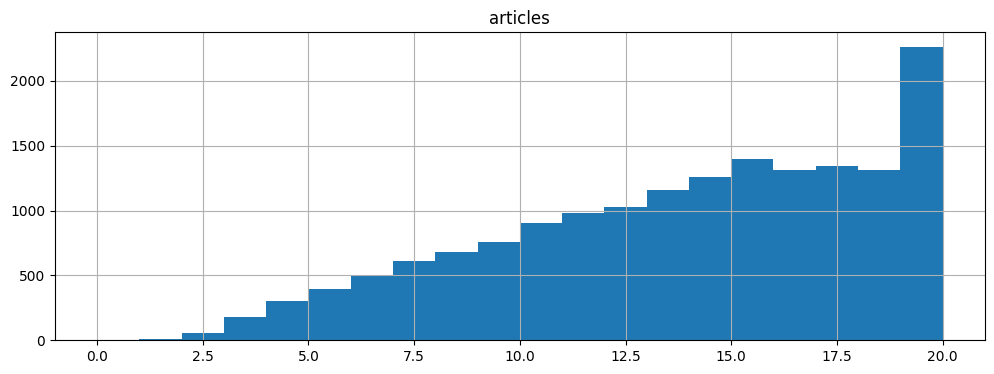

In [191]:
tweet_word_count = [len(sentence.split()) for sentence in filterTweets.body]
tweet_word_count[:10]

# Analyze the distribution of sequences by looking at the length of the texts
pd.DataFrame({'articles': tweet_word_count}).hist(
    bins=20, figsize=(12, 4), range=[0, 20]
)
plt.show()

In [192]:
tokenizer = Tokenizer(num_words=3000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequence = tokenizer.texts_to_sequences(X_test)
valid_sequence = tokenizer.texts_to_sequences(eval_data_x)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)
pad_valid = pad_sequences(valid_sequence, T)

# Define the model architecture
model_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_vec
model_vec.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_vec.h5", save_best_only=True)

# Train the model_vec
history_subjectivity_tokenizer = model_vec.fit(pad_train, y_train, epochs=15, batch_size=16, validation_data=(pad_test, y_test), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_vec on the test set
model_vec.load_weights("model_polarity_vec.h5")
test_loss, test_acc = model_vec.evaluate(pad_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time_eval = time.time()
y_pred = model_vec.predict(pad_test)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_vec.predict(pad_valid)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report( y_test,y_pred,time_taken,len( y_test), eval_data_y_polarity, y_pred_eval, time_taken_eval, len(eval_data_y_polarity))

Epoch 1/15
583/583 [==============================] - 18s 27ms/step - loss: 0.5196 - accuracy: 0.7457 - val_loss: 0.3738 - val_accuracy: 0.8386
Epoch 2/15
583/583 [==============================] - 16s 27ms/step - loss: 0.3031 - accuracy: 0.8796 - val_loss: 0.3325 - val_accuracy: 0.8630
Epoch 3/15
583/583 [==============================] - 16s 27ms/step - loss: 0.2194 - accuracy: 0.9183 - val_loss: 0.3739 - val_accuracy: 0.8570
Epoch 4/15
583/583 [==============================] - 16s 27ms/step - loss: 0.1606 - accuracy: 0.9464 - val_loss: 0.3796 - val_accuracy: 0.8489
Epoch 5/15
583/583 [==============================] - 16s 27ms/step - loss: 0.1079 - accuracy: 0.9654 - val_loss: 0.4585 - val_accuracy: 0.8454
Epoch 6/15
583/583 [==============================] - 16s 27ms/step - loss: 0.0774 - accuracy: 0.9761 - val_loss: 0.4980 - val_accuracy: 0.8459
Epoch 7/15
583/583 [==============================] - 15s 26ms/step - loss: 0.0576 - accuracy: 0.9839 - val_loss: 0.5939 - val_accuracy:

In [193]:
# Tokenise words by splittign them up.
tokenizer = Tokenizer(num_words=2500, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_lemma)
# Creates a dictionary of each word.
word_index = tokenizer.word_index
#Transforms each text into a sequence of interger from the word_index dictionary
train_sequences = tokenizer.texts_to_sequences(X_train_lemma)
test_sequences = tokenizer.texts_to_sequences(X_test_lemma)
valid_sequences = tokenizer.texts_to_sequences(eval_data_x_lemma)

# Pad the train sequence and make sure that the test sequence are of same length
pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequences,T)
pad_valid = pad_sequences(valid_sequences,T)

# Define the model_lemma_vec architecture
model_lemma_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_lemma_vec
model_lemma_vec.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_lemma_vec.h5", save_best_only=True)

# Train the model_lemma_vec
history_subjectivity_tokenizer_lemma = model_lemma_vec.fit(pad_train, y_train_lemma, epochs=15, batch_size=16, validation_data=(pad_test, y_test_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_lemma_vec on the test set
model_lemma_vec.load_weights("model_polarity_lemma_vec.h5")
test_loss, test_acc = model_lemma_vec.evaluate(pad_test, y_test_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_lemma_vec.predict(pad_test)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_lemma_vec.predict(pad_valid)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval
metric_report( y_test_lemma,y_pred,time_taken,len( y_test_lemma), eval_data_y_polarity_lemma, y_pred_eval, time_taken_eval, len(eval_data_y_polarity_lemma))

Epoch 1/15
583/583 [==============================] - 19s 28ms/step - loss: 0.5183 - accuracy: 0.7463 - val_loss: 0.3955 - val_accuracy: 0.8235
Epoch 2/15
583/583 [==============================] - 16s 28ms/step - loss: 0.3123 - accuracy: 0.8756 - val_loss: 0.3766 - val_accuracy: 0.8441
Epoch 3/15
583/583 [==============================] - 16s 28ms/step - loss: 0.2384 - accuracy: 0.9100 - val_loss: 0.3863 - val_accuracy: 0.8459
Epoch 4/15
583/583 [==============================] - 16s 28ms/step - loss: 0.1798 - accuracy: 0.9375 - val_loss: 0.4243 - val_accuracy: 0.8433
Epoch 5/15
583/583 [==============================] - 16s 28ms/step - loss: 0.1281 - accuracy: 0.9576 - val_loss: 0.4808 - val_accuracy: 0.8364
Epoch 6/15
583/583 [==============================] - 16s 28ms/step - loss: 0.0919 - accuracy: 0.9715 - val_loss: 0.5609 - val_accuracy: 0.8437
Epoch 7/15
583/583 [==============================] - 16s 28ms/step - loss: 0.0659 - accuracy: 0.9796 - val_loss: 0.6628 - val_accuracy:

In [194]:
tokenizer = Tokenizer(num_words=3000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_no)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_no)
test_sequence = tokenizer.texts_to_sequences(X_test_no)
valid_sequence = tokenizer.texts_to_sequences(eval_data_x_no)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)
pad_valid = pad_sequences(valid_sequence, T)

# Define the model architecture
model_no_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_no_vec
model_no_vec.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_no_vec.h5", save_best_only=True)

# Train the model_no_vec
history_subjectivity_no_tokenizer = model_no_vec.fit(pad_train, y_train_no, epochs=15, batch_size=16, validation_data=(pad_test, y_test_no), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_no_vec on the test set
model_no_vec.load_weights("model_polarity_no_vec.h5")
test_loss, test_acc = model_no_vec.evaluate(pad_test, y_test_no)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time_eval = time.time()
y_pred = model_no_vec.predict(pad_test)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time

start_time_eval = time.time()
y_pred_eval = model_no_vec.predict(pad_valid)
end_time_eval = time.time()
y_pred_eval = (y_pred_eval >= 0.5).astype(int)
time_taken_eval =  end_time_eval - start_time_eval

metric_report( y_test_no,y_pred,time_taken,len( y_test_no), eval_data_y_polarity_no, y_pred_eval, time_taken_eval, len(eval_data_y_polarity_no))

Epoch 1/15
583/583 [==============================] - 20s 29ms/step - loss: 0.5325 - accuracy: 0.7374 - val_loss: 0.3931 - val_accuracy: 0.8205
Epoch 2/15
583/583 [==============================] - 17s 29ms/step - loss: 0.3121 - accuracy: 0.8766 - val_loss: 0.3549 - val_accuracy: 0.8502
Epoch 3/15
583/583 [==============================] - 16s 28ms/step - loss: 0.2251 - accuracy: 0.9162 - val_loss: 0.3705 - val_accuracy: 0.8484
Epoch 4/15
583/583 [==============================] - 16s 28ms/step - loss: 0.1697 - accuracy: 0.9413 - val_loss: 0.4626 - val_accuracy: 0.8381
Epoch 5/15
583/583 [==============================] - 16s 27ms/step - loss: 0.1189 - accuracy: 0.9624 - val_loss: 0.5378 - val_accuracy: 0.8291
Epoch 6/15
583/583 [==============================] - 16s 28ms/step - loss: 0.0796 - accuracy: 0.9748 - val_loss: 0.5845 - val_accuracy: 0.8308
Epoch 7/15
583/583 [==============================] - 16s 27ms/step - loss: 0.0566 - accuracy: 0.9844 - val_loss: 0.7537 - val_accuracy:

In [195]:
filterSubjTweets

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,preprocessed_text,sentiment,subjectivity,sentiment_category,subjectivity_category
39968,4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...,0.5106,0.900000,1,1
10501,2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...,-0.4939,0.600000,0,1
38261,4276279,1187430268967231488,TSLA,jack,2019-10-24,Now anyone can buy $42 or even $1 worth of Ber...,298,589,0,887,now anyon can buy or even worth of berkshir ha...,0.9077,0.568197,1,1
27692,4076527,1107399412492455936,TSLA,ElectricTempus,2019-03-17,"People are buying Tesla’s, in their Tesla’s. ...",292,0,0,292,peopl are buy tesla in their tesla thi is mani...,0.6369,0.550000,1,1
15224,3750143,1000079401684557824,TSLA,MattLevinson,2018-05-25,Thank you @elonmusk and @tesla for by FAR the ...,290,840,0,1130,thank you and for by far the best consum produ...,0.6705,0.675000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,878057,797455918141214721,AAPL,cnntech,2016-11-12,This school helps inexperienced programmers la...,0,38,82,120,thi school help inexperienc programm land job ...,0.3818,0.600000,1,1
1823,875999,796549335836229632,AAPL,Sandro_power,2016-11-10,$AAPL $SPY AND $STLD Video https://youtu.be/o0...,0,24,33,57,aapl spi and stld video explain my plan that i...,0.2023,0.687500,1,1
12927,3347135,1111056020036571137,MSFT,simpltrader,2019-03-28,Day 8 of #25KSimplChallenge An awesome day wit...,0,28,28,56,day of an awesom day with shop wa up k profit ...,0.9685,0.645000,1,1
18187,3856253,1031725885106343936,TSLA,TESLAcharts,2018-08-21,A FingerChart dedicated to my favorite follow ...,0,3,55,58,a fingerchart dedic to my favorit follow on tw...,0.7184,1.000000,1,1


# Enhanced Classification for Sarcasm Detection Model

Importing a Kaggle Sarcasm Headlines dataset to train our model to detect sarcasm in tweets

In [196]:
sarcasm_df = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines = True)

In [197]:
sarcasm_df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [198]:
datasetInfo(sarcasm_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB
 Dataset Information and type 
 None
--------------------------------------------------------

 Data Types: 
is_sarcastic     int64
headline        object
article_link    object
dtype: object
--------------------------------------------------------

 Rows and Columns: 
(28619, 3)
--------------------------------------------------------

 Column Names: 
Index(['is_sarcastic', 'headline', 'article_link'], dtype='object')
--------------------------------------------------------

 Null Values: 
is_sarcastic    0.0
headline        0.0
article_link    0.0
dtype: float64
--------------------------------------------------------

 

In [199]:
sarcasm_df["is_sarcastic"].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

### Clean the Sarcasm Dataframe text

In [200]:
clean_dataframe_text(sarcasm_df,"headline",False)

,is_sarcastic,headline,article_link
0,1,thirtysometh scientist unveil doomsday clock o...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep total nail whi congress is fall short ...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggi delici differ recip,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevent liar from get to work,https://local.theonion.com/inclement-weather-p...
4,1,mother come pretti close to use word stream co...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jew to celebr rosh hashasha or someth,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,intern affair investig disappoint conspiraci d...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beauti accept speech thi week came fr...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mar probe destroy by orbit spielbergg space palac,https://www.theonion.com/mars-probe-destroyed-...


In [201]:
X_sarcasm = sarcasm_df["headline"].values 
y_sarcasm = sarcasm_df["is_sarcastic"].values
X_train_sarcasm, X_test_sarcasm, y_train_sarcasm, y_test_sarcasm = train_test_split(
    X_sarcasm, y_sarcasm, test_size=0.20, random_state=42)

In [202]:
X_train_sarcasm.shape

(22895,)

In [203]:
tokenizer = Tokenizer(num_words=2500, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_sarcasm)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_sarcasm)
test_sequence = tokenizer.texts_to_sequences(X_test_sarcasm)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)

max_length = max(len(seq) for seq in train_sequences)

# Define the model architecture
model_sarcasm = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=max_length, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_sarcasm.summary()
# Compile the model_sarcasm
model_sarcasm.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_sarcasm.h5", save_best_only=True)

# Train the model_sarcasm
history_sarcasm = model_sarcasm.fit(pad_train, y_train_sarcasm, epochs=10, batch_size=32, validation_data=(pad_test, y_test_sarcasm), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_sarcasm on the test set
model_sarcasm.load_weights("model_sarcasm.h5")
test_loss, test_acc = model_sarcasm.evaluate(pad_test, y_test_sarcasm)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_sarcasm.predict(pad_test)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time
metric_report_noeval(y_test_sarcasm,y_pred,time_taken,len(y_test_sarcasm))

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 38, 100)           1768900   
                                                                 
 bidirectional_9 (Bidirectio  (None, 38, 128)          84480     
 nal)                                                            
                                                                 
 global_max_pooling1d_9 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_80 (Dense)            (None, 32)                4128      
                                                                 
 dropout_56 (Dropout)        (None, 32)                0         
                                                                 
 dense_81 (Dense)            (None, 1)               

In [204]:
filterTweetsTemp = filterTweets.copy()

In [205]:
X_train_temp = filterTweetsTemp['body']

In [206]:
print(len(X_train_temp))

41625


In [207]:
# Tokenise words by splittign them up.
tokenizer = Tokenizer(num_words=2500, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_temp)
# Creates a dictionary of each word.
word_index = tokenizer.word_index
#Transforms each text into a sequence of interger from the word_index dictionary
test_sequence_x = tokenizer.texts_to_sequences(X_train_temp)

# Pad the train sequence and make sure that the test sequence are of same length
pad_train_x = pad_sequences(test_sequence_x)


In [208]:
sarcasm_pred = model_sarcasm.predict(pad_train_x)

1301/1301 [==============================] - 16s 12ms/step


In [209]:
sarcasm_pred = (sarcasm_pred >= 0.5).astype(int)
print(sarcasm_pred)

[[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]


In [210]:
len(sarcasm_pred)

41625

In [211]:
filterTweetsTemp['is_sarcasm'] = sarcasm_pred

In [212]:
filterTweetsTemp

,Unnamed: 0,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,preprocessed_text,sentiment,subjectivity,sentiment_category,subjectivity_category,is_sarcasm
16050,3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000,id just like to point out that right now right...,0.7783,0.457143,1,0,1
29670,4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567,if a tesla save you a month on ga you own it f...,0.0000,0.400000,0,0,1
39968,4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273,tesla featur request threadfeel free to repli ...,0.5106,0.900000,1,1,0
10501,2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496,i sell book versu i sell whatev the fuck i wan...,-0.4939,0.600000,-1,1,0
33022,4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442,i think is basic financi insan to buy anyth ex...,0.2350,0.383333,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12929,3347805,1113794842461724672,MSFT,StockRockNRoll,2019-04-04,Add $SNWV | #SANUWAVEHealth to the top of your...,0,82,97,179,add snwv to the top of your watchlist trade at...,0.5707,0.500000,1,0,1
18187,3856253,1031725885106343936,TSLA,TESLAcharts,2018-08-21,A FingerChart dedicated to my favorite follow ...,0,3,55,58,a fingerchart dedic to my favorit follow on tw...,0.7184,1.000000,1,1,0
1820,873615,795832008656252928,AAPL,Sandro_power,2016-11-08,$AAPL in my Video https://youtu.be/9ZNFi0B4CsQ...,0,31,36,67,aapl in my video i talk about the special aapl...,0.4019,0.571429,1,1,1
1818,872187,795454505357889537,AAPL,ppprophet,2016-11-07,$SPX UPTREND LINE BREAKDOWN #stocks #STOCKMAR...,0,41,52,93,spx uptrend line breakdown vix tvix uvxi xiv v...,0.0000,0.000000,0,0,1
